# <font color='056938'> Caso de Estudio Aprendizaje No Supervisado </font>
---

### Valoraciones sobre viajes

Este conjunto de datos se obtiene a partir de las valoraciones de los usuarios en Google. Se tienen en cuenta las opiniones sobre atracciones de 24 categorías de toda Europa. Las valoraciones de los usuarios de Google van de 1 a 5 y se calcula la valoración media por categoría.

## <font color='157699'> Importanción de Librerías </font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.datasets import make_blobs

from scipy import stats
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

%pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

%pip install kneed
from kneed import KneeLocator

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")
warnings.simplefilter(action="ignore", category=FutureWarning)

## <font color='157699'> Lectura del Dataset </font>

In [3]:
# Lectura del dataset
df = pd.read_csv('https://raw.githubusercontent.com/Leostark95/Analitica_2_Proyecto_2/master/BD.csv', sep = ";")
df.head()

User  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1         0.0         0.0        3.63        3.65         5.0   
1  User 2         0.0         0.0        3.63        3.65         5.0   
2  User 3         0.0         0.0        3.63        3.63         5.0   
3  User 4         0.0         0.5        3.63        3.63         5.0   
4  User 5         0.0         0.0        3.63        3.63         5.0   

   Category 6  Category 7  Category 8  Category 9  ...  Category 16  \
0        2.92         5.0        2.35        2.33  ...         0.59   
1        2.92         5.0        2.64        2.33  ...         0.59   
2        2.92         5.0        2.64        2.33  ...         0.59   
3        2.92         5.0        2.35        2.33  ...         0.59   
4        2.92         5.0        2.64        2.33  ...         0.59   

  Category 17  Category 18  Category 19  Category 20  Category 21  \
0         0.5          0.0          0.5          0.0          0.0   
1         0.5          0.0          0.5          0.0          0.0   
2         0.5          0.0          0.5          0.0          0.0   
3         0.5          0.0          0.5          0.0          0.0   
4         0.5          0.0          0.5          0.0          0.0   

   Category 22  Category 23  Category 24  Unnamed: 25  
0          0.0          0.0          0.0          NaN  
1          0.0          0.0          0.0          NaN  
2          0.0          0.0          0.0          NaN  
3          0.0          0.0          0.0          NaN  
4          0.0          0.0          0.0          NaN  

[5 rows x 26 columns]

In [4]:
nuevos_nombres = {
    'Category 1': 'churches', 'Category 2': 'resorts', 'Category 3': 'beaches', 'Category 4': 'parks', 'Category 5': 'theatres', 'Category 6': 'museums', 'Category 7': 'malls',
    'Category 8': 'zoo', 'Category 9': 'restaurants', 'Category 10': 'pubs/bars', 'Category 11': 'local services', 'Category 12': 'burger/pizza shops', 'Category 13': 'hotels/other lodgings',
    'Category 14': 'juice bars', 'Category 15': 'art galleries', 'Category 16': 'dance clubs', 'Category 17': 'swimming pools', 'Category 18': 'gyms', 'Category 19': 'bakeries',
    'Category 20': 'beauty & spas', 'Category 21': 'cafes', 'Category 22': 'view points', 'Category 23': 'monuments', 'Category 24': 'gardens'
}

df.rename(columns=nuevos_nombres, inplace=True)


In [5]:
df.head()

User  churches  resorts  beaches  parks  theatres  museums  malls   zoo  \
0  User 1       0.0      0.0     3.63   3.65       5.0     2.92    5.0  2.35   
1  User 2       0.0      0.0     3.63   3.65       5.0     2.92    5.0  2.64   
2  User 3       0.0      0.0     3.63   3.63       5.0     2.92    5.0  2.64   
3  User 4       0.0      0.5     3.63   3.63       5.0     2.92    5.0  2.35   
4  User 5       0.0      0.0     3.63   3.63       5.0     2.92    5.0  2.64   

   restaurants  ...  dance clubs swimming pools  gyms  bakeries  \
0         2.33  ...         0.59            0.5   0.0       0.5   
1         2.33  ...         0.59            0.5   0.0       0.5   
2         2.33  ...         0.59            0.5   0.0       0.5   
3         2.33  ...         0.59            0.5   0.0       0.5   
4         2.33  ...         0.59            0.5   0.0       0.5   

   beauty & spas  cafes  view points  monuments  gardens  Unnamed: 25  
0            0.0    0.0          0.0        0.0      0.0          NaN  
1            0.0    0.0          0.0        0.0      0.0          NaN  
2            0.0    0.0          0.0        0.0      0.0          NaN  
3            0.0    0.0          0.0        0.0      0.0          NaN  
4            0.0    0.0          0.0        0.0      0.0          NaN  

[5 rows x 26 columns]

## <font color='157699'> Limpieza y Transformación de Datos </font>

In [6]:
#Información general de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User                   5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs/bars              5456 non-null   float64
 11  local services         5456 non-null   object 
 12  burger/pizza shops     5455 non-null   float64
 13  hotels/other lodgings  5456 non-null   float64
 14  juice bars             5456 non-null   float64
 15  art 

In [7]:
df.drop('User', axis=1, inplace=True)

In [8]:
df['local services'] = pd.to_numeric(df['local services'], errors='coerce')


In [9]:
df.duplicated().sum()

3

In [10]:
df.isnull().sum()

churches                    0
resorts                     0
beaches                     0
parks                       0
theatres                    0
museums                     0
malls                       0
zoo                         0
restaurants                 0
pubs/bars                   0
local services              1
burger/pizza shops          1
hotels/other lodgings       0
juice bars                  0
art galleries               0
dance clubs                 0
swimming pools              0
gyms                        0
bakeries                    0
beauty & spas               0
cafes                       0
view points                 0
monuments                   0
gardens                     1
Unnamed: 25              5454
dtype: int64

In [11]:
df.isnull().sum().sum()

5457

In [12]:
df.drop('Unnamed: 25', axis=1, inplace=True)

In [13]:
df[['local services', 'burger/pizza shops', 'gardens']] = df[['local services', 'burger/pizza shops', 'gardens']].interpolate(method='linear')

In [14]:
df.isnull().sum()

churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       0
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   float64
 11  burger/pizza shops     5456 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15  danc

## <font color='157699'> Análisis Exploratorio de Datos </font>

In [16]:
df.describe()

churches      resorts      beaches        parks     theatres  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.455720     2.319707     2.489331     2.796886     2.958941   
std       0.827604     1.421438     1.247815     1.309159     1.339056   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
25%       0.920000     1.360000     1.540000     1.730000     1.770000   
50%       1.340000     1.905000     2.060000     2.460000     2.670000   
75%       1.810000     2.682500     2.740000     4.092500     4.312500   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

          museums        malls          zoo  restaurants    pubs/bars  ...  \
count  5456.00000  5456.000000  5456.000000  5456.000000  5456.000000  ...   
mean      2.89349     3.351395     2.540795     3.126019     2.832729  ...   
std       1.28240     1.413492     1.111391     1.356802     1.307665  ...   
min       1.11000     1.120000     0.860000     0.840000     0.810000  ...   
25%       1.79000     1.930000     1.620000     1.800000     1.640000  ...   
50%       2.68000     3.230000     2.170000     2.800000     2.680000  ...   
75%       3.84000     5.000000     3.190000     5.000000     3.530000  ...   
max       5.00000     5.000000     5.000000     5.000000     5.000000  ...   

       art galleries  dance clubs  swimming pools         gyms     bakeries  \
count    5456.000000  5456.000000     5456.000000  5456.000000  5456.000000   
mean        2.206573     1.192801        0.949203     0.822414     0.969811   
std         1.715961     1.107005        0.973536     0.947911     1.203972   
min         0.000000     0.000000        0.000000     0.000000     0.000000   
25%         0.860000     0.690000        0.580000     0.530000     0.520000   
50%         1.330000     0.800000        0.740000     0.690000     0.690000   
75%         4.440000     1.160000        0.910000     0.840000     0.860000   
max         5.000000     5.000000        5.000000     5.000000     5.000000   

       beauty & spas        cafes  view points    monuments     gardens  
count    5456.000000  5456.000000  5456.000000  5456.000000  5456.00000  
mean        1.000071     0.965838     1.750537     1.531453     1.56066  
std         1.193891     0.929853     1.598734     1.316889     1.17167  
min         0.000000     0.000000     0.000000     0.000000     0.00000  
25%         0.540000     0.570000     0.740000     0.790000     0.88000  
50%         0.690000     0.760000     1.030000     1.070000     1.29000  
75%         0.860000     1.000000     2.070000     1.560000     1.66000  
max         5.000000     5.000000     5.000000     5.000000     5.00000  

[8 rows x 24 columns]

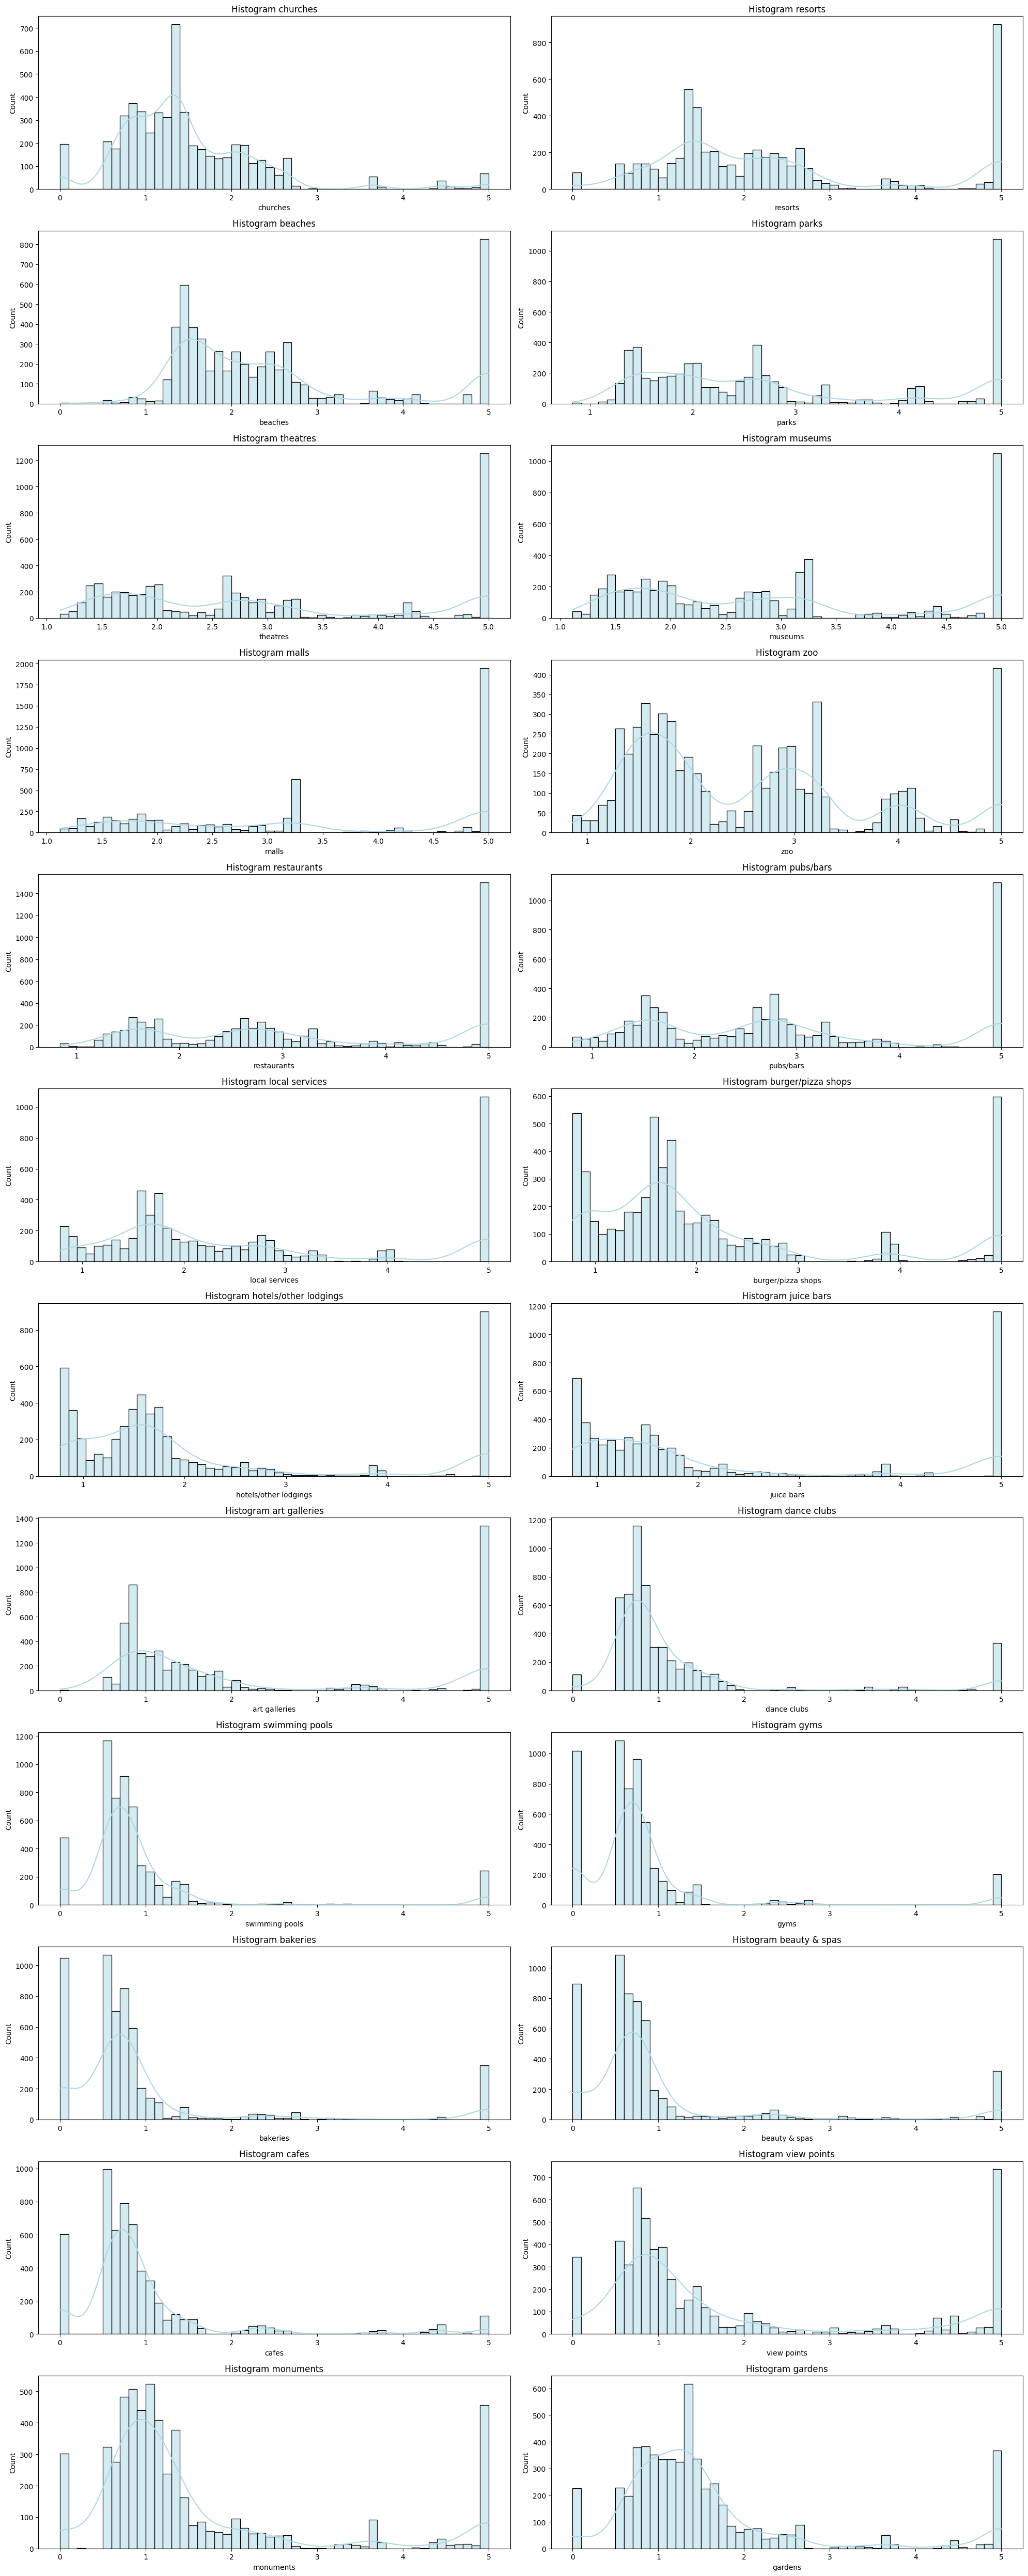

In [17]:
num_filas = 12
num_columnas = 2

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 50))

for i, variable in enumerate(df):
    fila = i // num_columnas
    columna = i % num_columnas
    sns.histplot(df[variable], bins=50, kde=True, color='lightblue', ax=axs[fila, columna])
    axs[fila, columna].set_title(f'Histogram {variable}')
    #axs[fila, columna].grid(True)

plt.tight_layout()
plt.show()

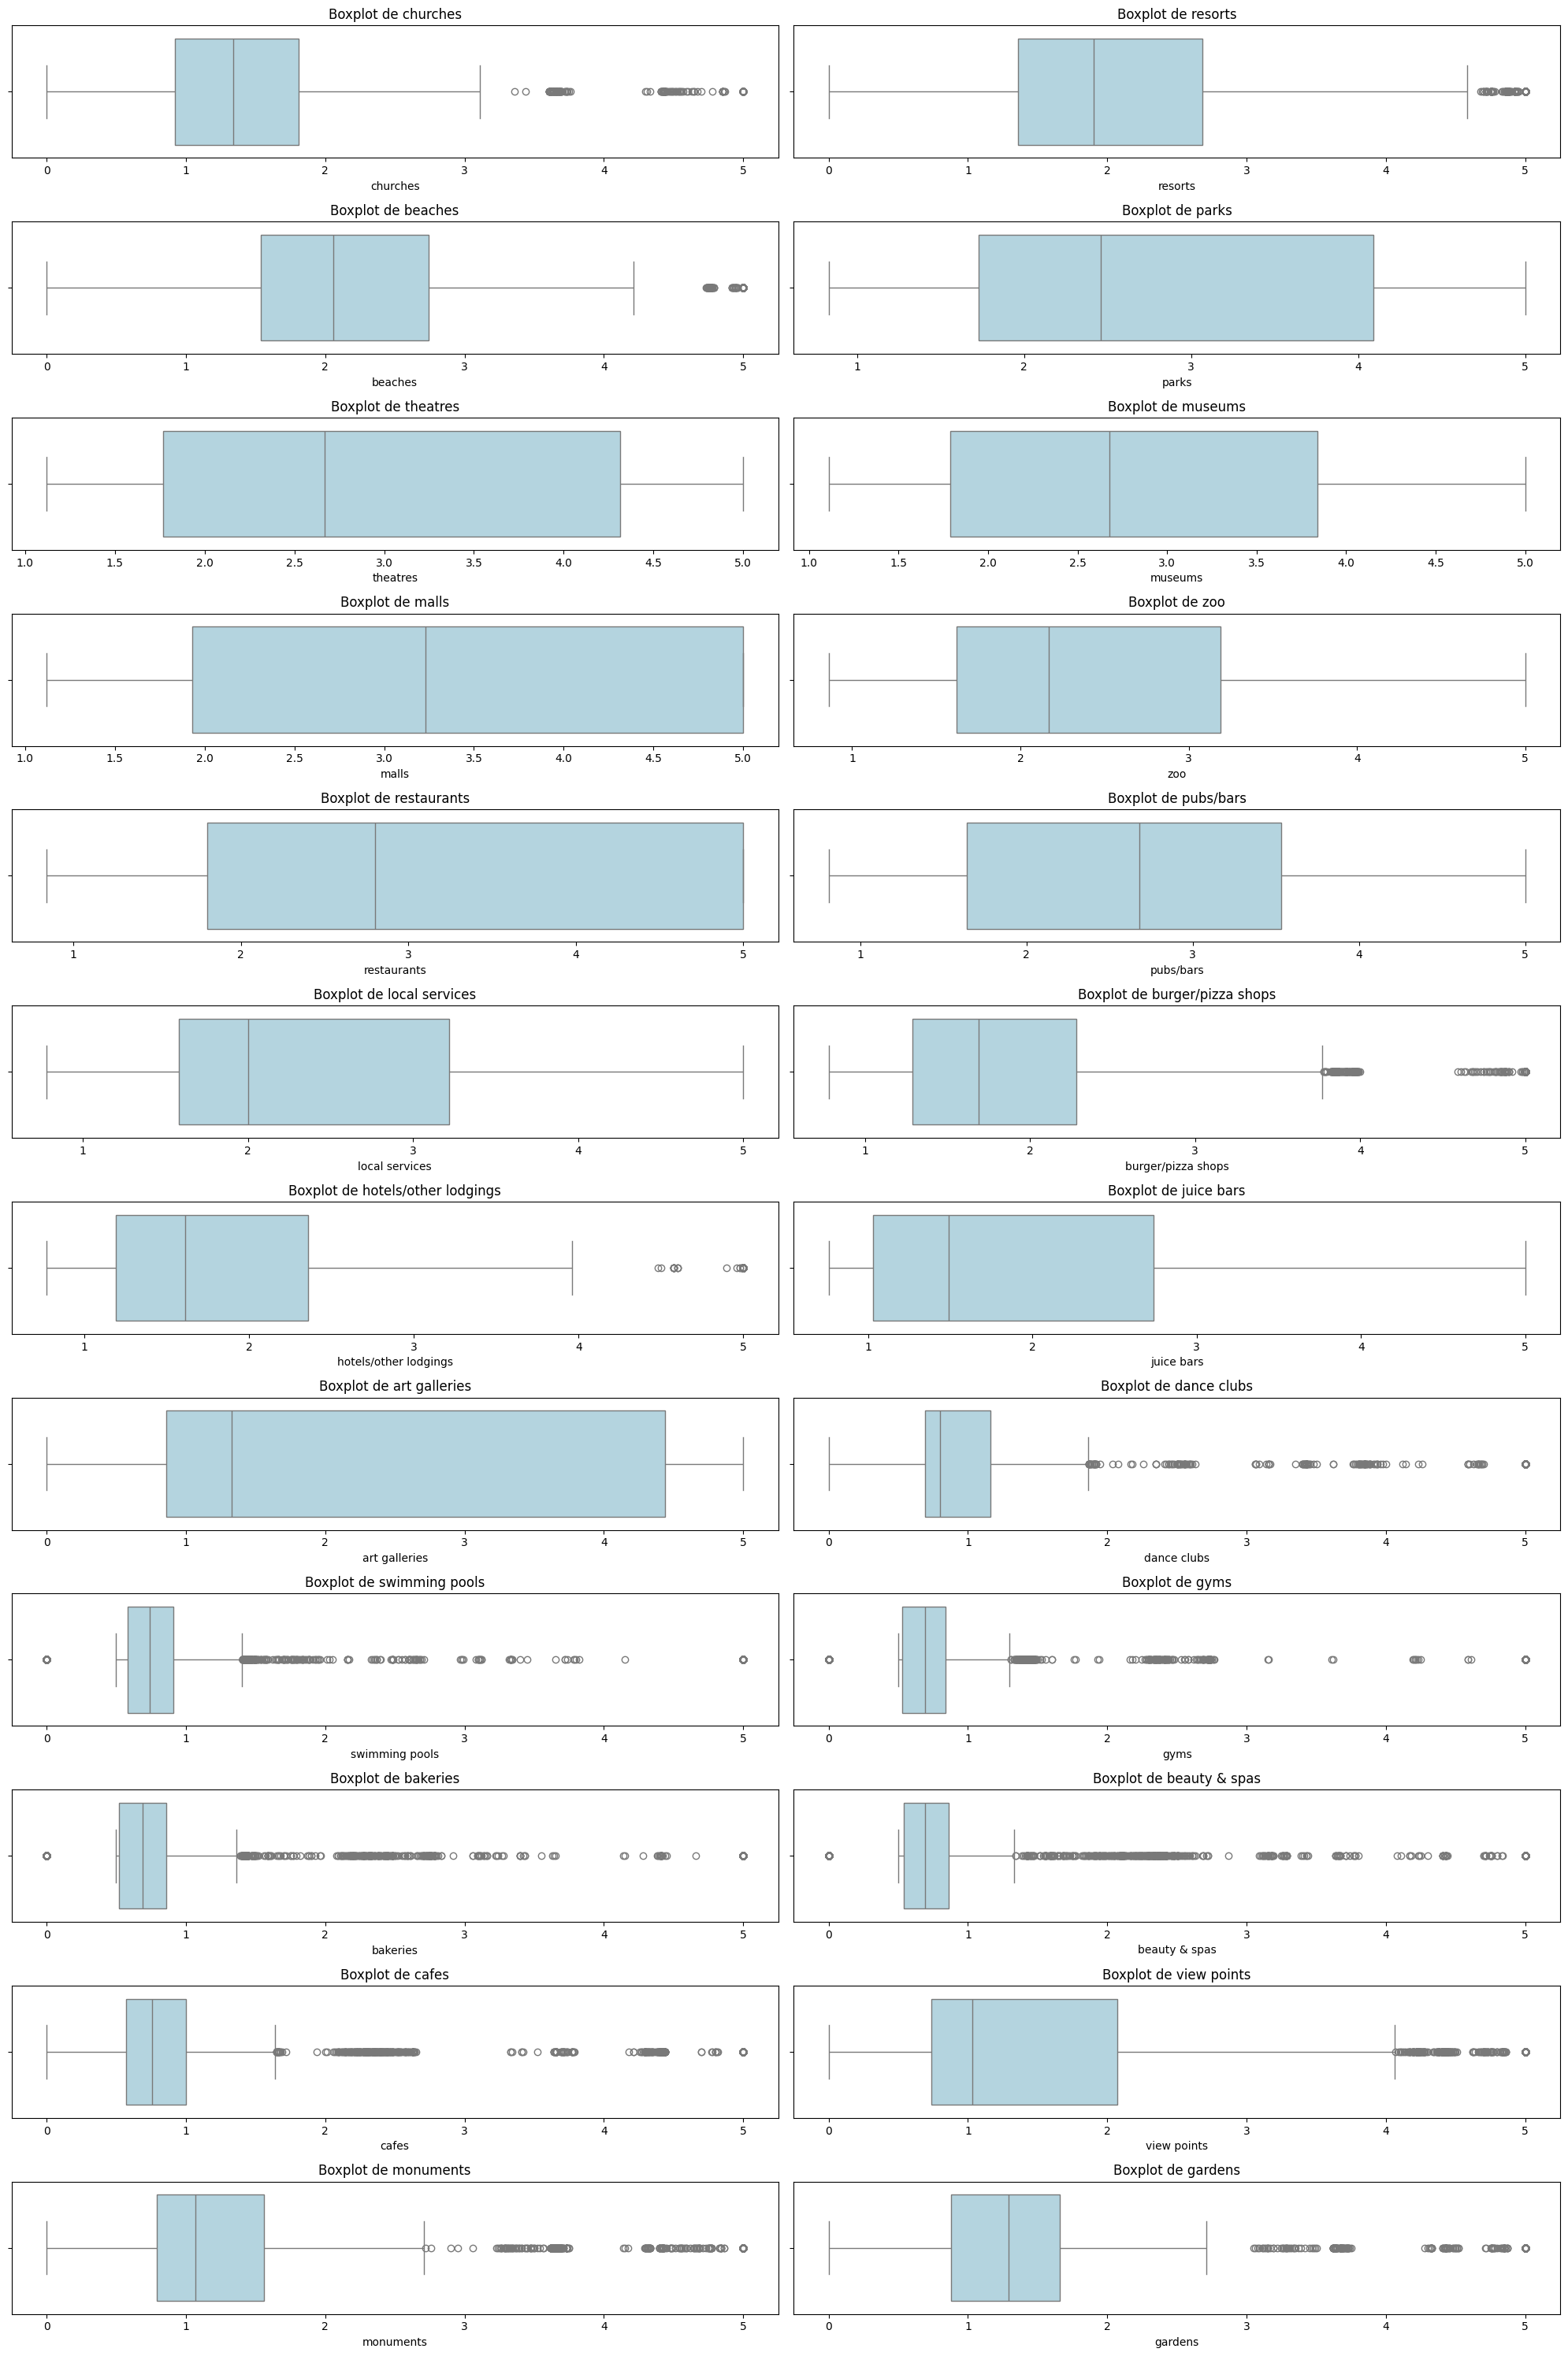

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(12, 2, figsize=(20, 30))

for i, variable in enumerate(df):
    fila = i // 2
    columna = i % 2
    
    sns.boxplot(x=df[variable], ax=axs[fila, columna], color='lightblue')
    axs[fila, columna].set_title(f'Boxplot de {variable}')

plt.tight_layout()
plt.show()


In [19]:
corrmat = df.corr()
corrmat

churches   resorts   beaches     parks  theatres  \
churches               1.000000  0.248991  0.148805  0.070692  0.035451   
resorts                0.248991  1.000000  0.325011  0.167338  0.153520   
beaches                0.148805  0.325011  1.000000  0.396786  0.329925   
parks                  0.070692  0.167338  0.396786  1.000000  0.626868   
theatres               0.035451  0.153520  0.329925  0.626868  1.000000   
museums               -0.093143  0.053916  0.161242  0.315354  0.489937   
malls                 -0.264632 -0.050158 -0.072713 -0.067914  0.077807   
zoo                   -0.181267 -0.004500 -0.186308 -0.128064 -0.002595   
restaurants           -0.290214 -0.050550 -0.219842 -0.169442 -0.170430   
pubs/bars             -0.274683 -0.092526 -0.179090 -0.115515 -0.100191   
local services        -0.214775 -0.221425 -0.157332 -0.116849 -0.123972   
burger/pizza shops    -0.261220 -0.156971 -0.235523 -0.165870 -0.104690   
hotels/other lodgings -0.178666 -0.213747 -0.182322 -0.145093 -0.090369   
juice bars            -0.236966 -0.126713 -0.162605 -0.308164 -0.280767   
art galleries         -0.134914 -0.066670 -0.134203 -0.272130 -0.323902   
dance clubs            0.067285 -0.033119 -0.022249  0.018274 -0.056347   
swimming pools         0.130099 -0.077146 -0.084643 -0.132468 -0.184345   
gyms                   0.160360 -0.025446 -0.119810 -0.183849 -0.243357   
bakeries               0.180271  0.032529 -0.075402 -0.192665 -0.256987   
beauty & spas          0.199397  0.096974 -0.009202 -0.092453 -0.191997   
cafes                  0.309238  0.088990  0.001105 -0.056226 -0.133433   
view points            0.364375  0.018366  0.134571  0.276727  0.124431   
monuments              0.407033  0.077616  0.117458  0.173550  0.128055   
gardens                0.489280  0.125231  0.082472  0.090500  0.098706   

                        museums     malls       zoo  restaurants  pubs/bars  \
churches              -0.093143 -0.264632 -0.181267    -0.290214  -0.274683   
resorts                0.053916 -0.050158 -0.004500    -0.050550  -0.092526   
beaches                0.161242 -0.072713 -0.186308    -0.219842  -0.179090   
parks                  0.315354 -0.067914 -0.128064    -0.169442  -0.115515   
theatres               0.489937  0.077807 -0.002595    -0.170430  -0.100191   
museums                1.000000  0.382774  0.200528     0.114719  -0.019007   
malls                  0.382774  1.000000  0.406959     0.432054   0.256563   
zoo                    0.200528  0.406959  1.000000     0.536870   0.551409   
restaurants            0.114719  0.432054  0.536870     1.000000   0.564086   
pubs/bars             -0.019007  0.256563  0.551409     0.564086   1.000000   
local services        -0.147972  0.098379  0.292651     0.262246   0.469747   
burger/pizza shops    -0.163656  0.031137  0.003473    -0.012382   0.128656   
hotels/other lodgings -0.136938  0.025643 -0.010413     0.019325   0.066222   
juice bars            -0.153427  0.089101 -0.021850     0.032260  -0.001803   
art galleries         -0.187512  0.092527 -0.064692     0.126720   0.038084   
dance clubs           -0.149295 -0.142861 -0.124417    -0.119844  -0.031927   
swimming pools        -0.229604 -0.207275 -0.202950    -0.229585  -0.212346   
gyms                  -0.271354 -0.226475 -0.236106    -0.266700  -0.273837   
bakeries              -0.266608 -0.272979 -0.281018    -0.271881  -0.324115   
beauty & spas         -0.227362 -0.232408 -0.254393    -0.164033  -0.247502   
cafes                 -0.197454 -0.257728 -0.274733    -0.185958  -0.230389   
view points           -0.090481 -0.360287 -0.255520    -0.268053  -0.183660   
monuments             -0.081109 -0.223080 -0.167927    -0.268314  -0.213030   
gardens               -0.066540 -0.247628 -0.137232    -0.326461  -0.263569   

                       ...  art galleries  dance clubs  swimming pools  \
churches               ...      -0.134914     0.067285        0.130099   
resorts                

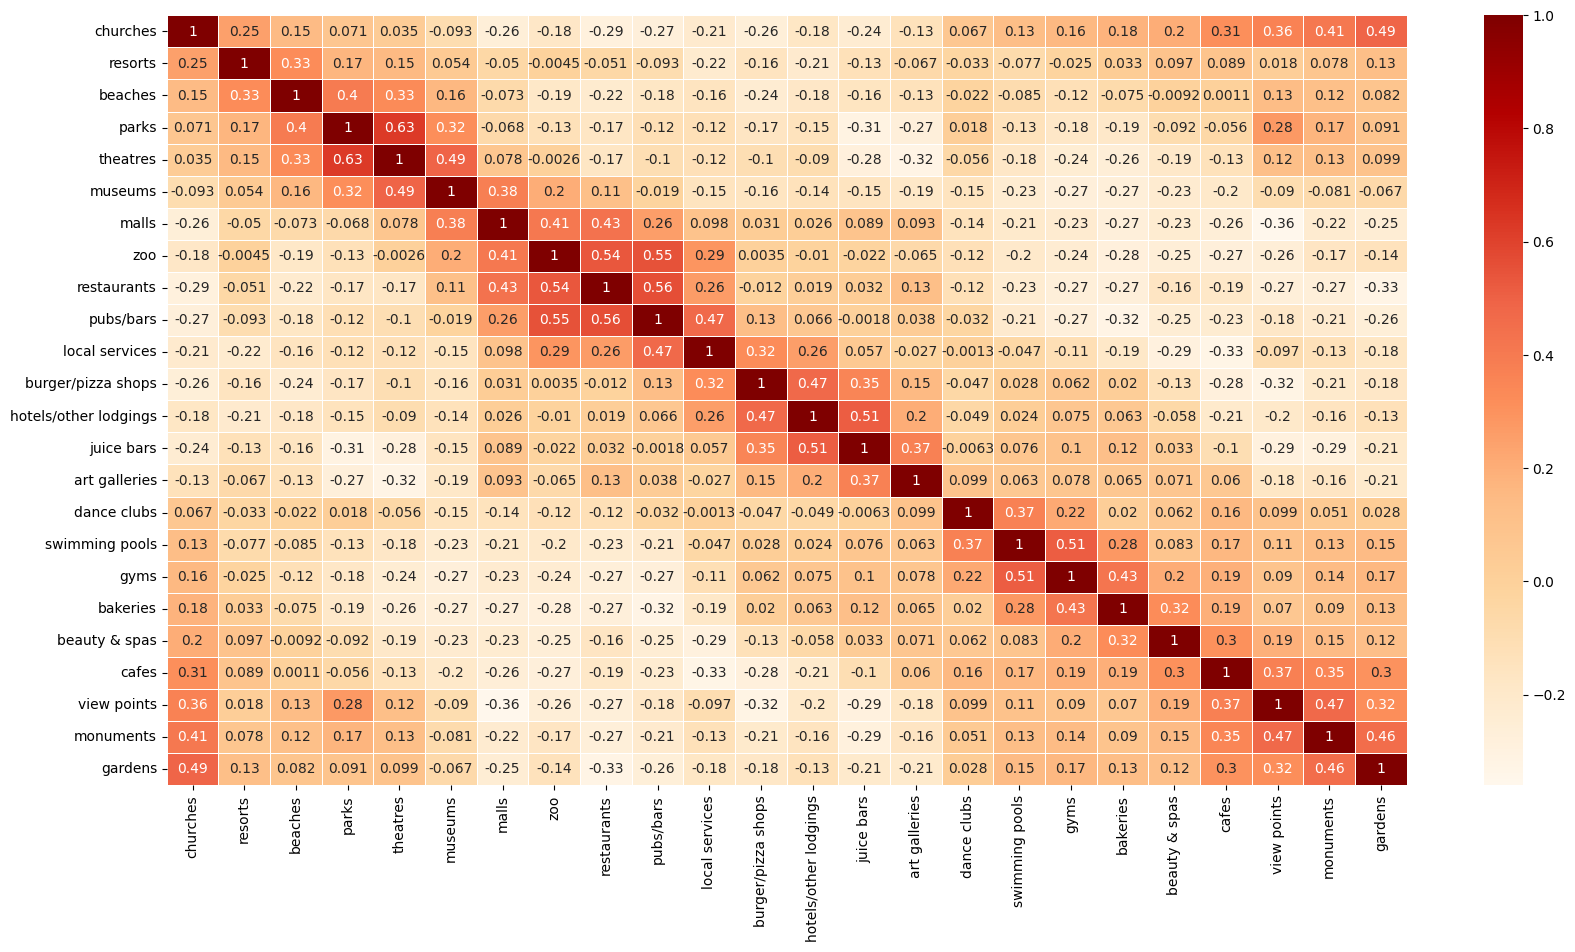

In [20]:
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(corrmat, annot = True,  cmap ='OrRd', linewidths=.5)
plt.show()

In [21]:
for variable in df:
    num_zeros = (df[variable] == 0).sum()
    print(f"Número de ceros en la variable '{variable}': {num_zeros}")

Número de ceros en la variable 'churches': 195
Número de ceros en la variable 'resorts': 90
Número de ceros en la variable 'beaches': 4
Número de ceros en la variable 'parks': 0
Número de ceros en la variable 'theatres': 0
Número de ceros en la variable 'museums': 0
Número de ceros en la variable 'malls': 0
Número de ceros en la variable 'zoo': 0
Número de ceros en la variable 'restaurants': 0
Número de ceros en la variable 'pubs/bars': 0
Número de ceros en la variable 'local services': 0
Número de ceros en la variable 'burger/pizza shops': 0
Número de ceros en la variable 'hotels/other lodgings': 0
Número de ceros en la variable 'juice bars': 0
Número de ceros en la variable 'art galleries': 4
Número de ceros en la variable 'dance clubs': 112
Número de ceros en la variable 'swimming pools': 479
Número de ceros en la variable 'gyms': 1017
Número de ceros en la variable 'bakeries': 1046
Número de ceros en la variable 'beauty & spas': 896
Número de ceros en la variable 'cafes': 604
Númer

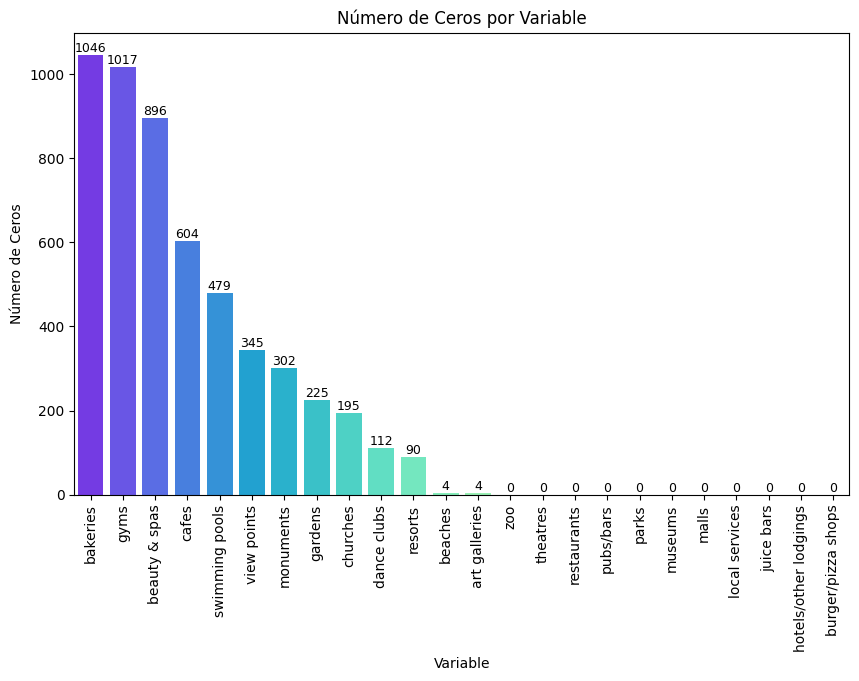

In [22]:
num_zeros_por_variable = []

for variable in df:
    num_zeros = (df[variable] == 0).sum()
    num_zeros_por_variable.append(num_zeros)

variables_numericas_ordenadas = [x for _, x in sorted(zip(num_zeros_por_variable, df), reverse=True)]

num_zeros_por_variable_ordenados = sorted(num_zeros_por_variable, reverse=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=variables_numericas_ordenadas, y=num_zeros_por_variable_ordenados, palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Número de Ceros')
plt.title('Número de Ceros por Variable')

for i, v in enumerate(num_zeros_por_variable_ordenados):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=9)

plt.show()

In [23]:
def imputar_outliers_por_valores_cercanos(df, rango=1):
    
    df2 = df.copy()
    
    for columna in df2.columns:
        
        media = df2[columna].mean()
        desviacion_estandar = df2[columna].std()
        
        limite_inferior = media - rango * desviacion_estandar
        limite_superior = media + rango * desviacion_estandar
        
        df2[columna] = df2[columna].apply(lambda x: df2[columna].abs().min() if x < limite_inferior else (df2[columna].abs().max() if x > limite_superior else x))
    
    return df2

df2 = df.copy()

df2 = imputar_outliers_por_valores_cercanos(df2, rango=1)

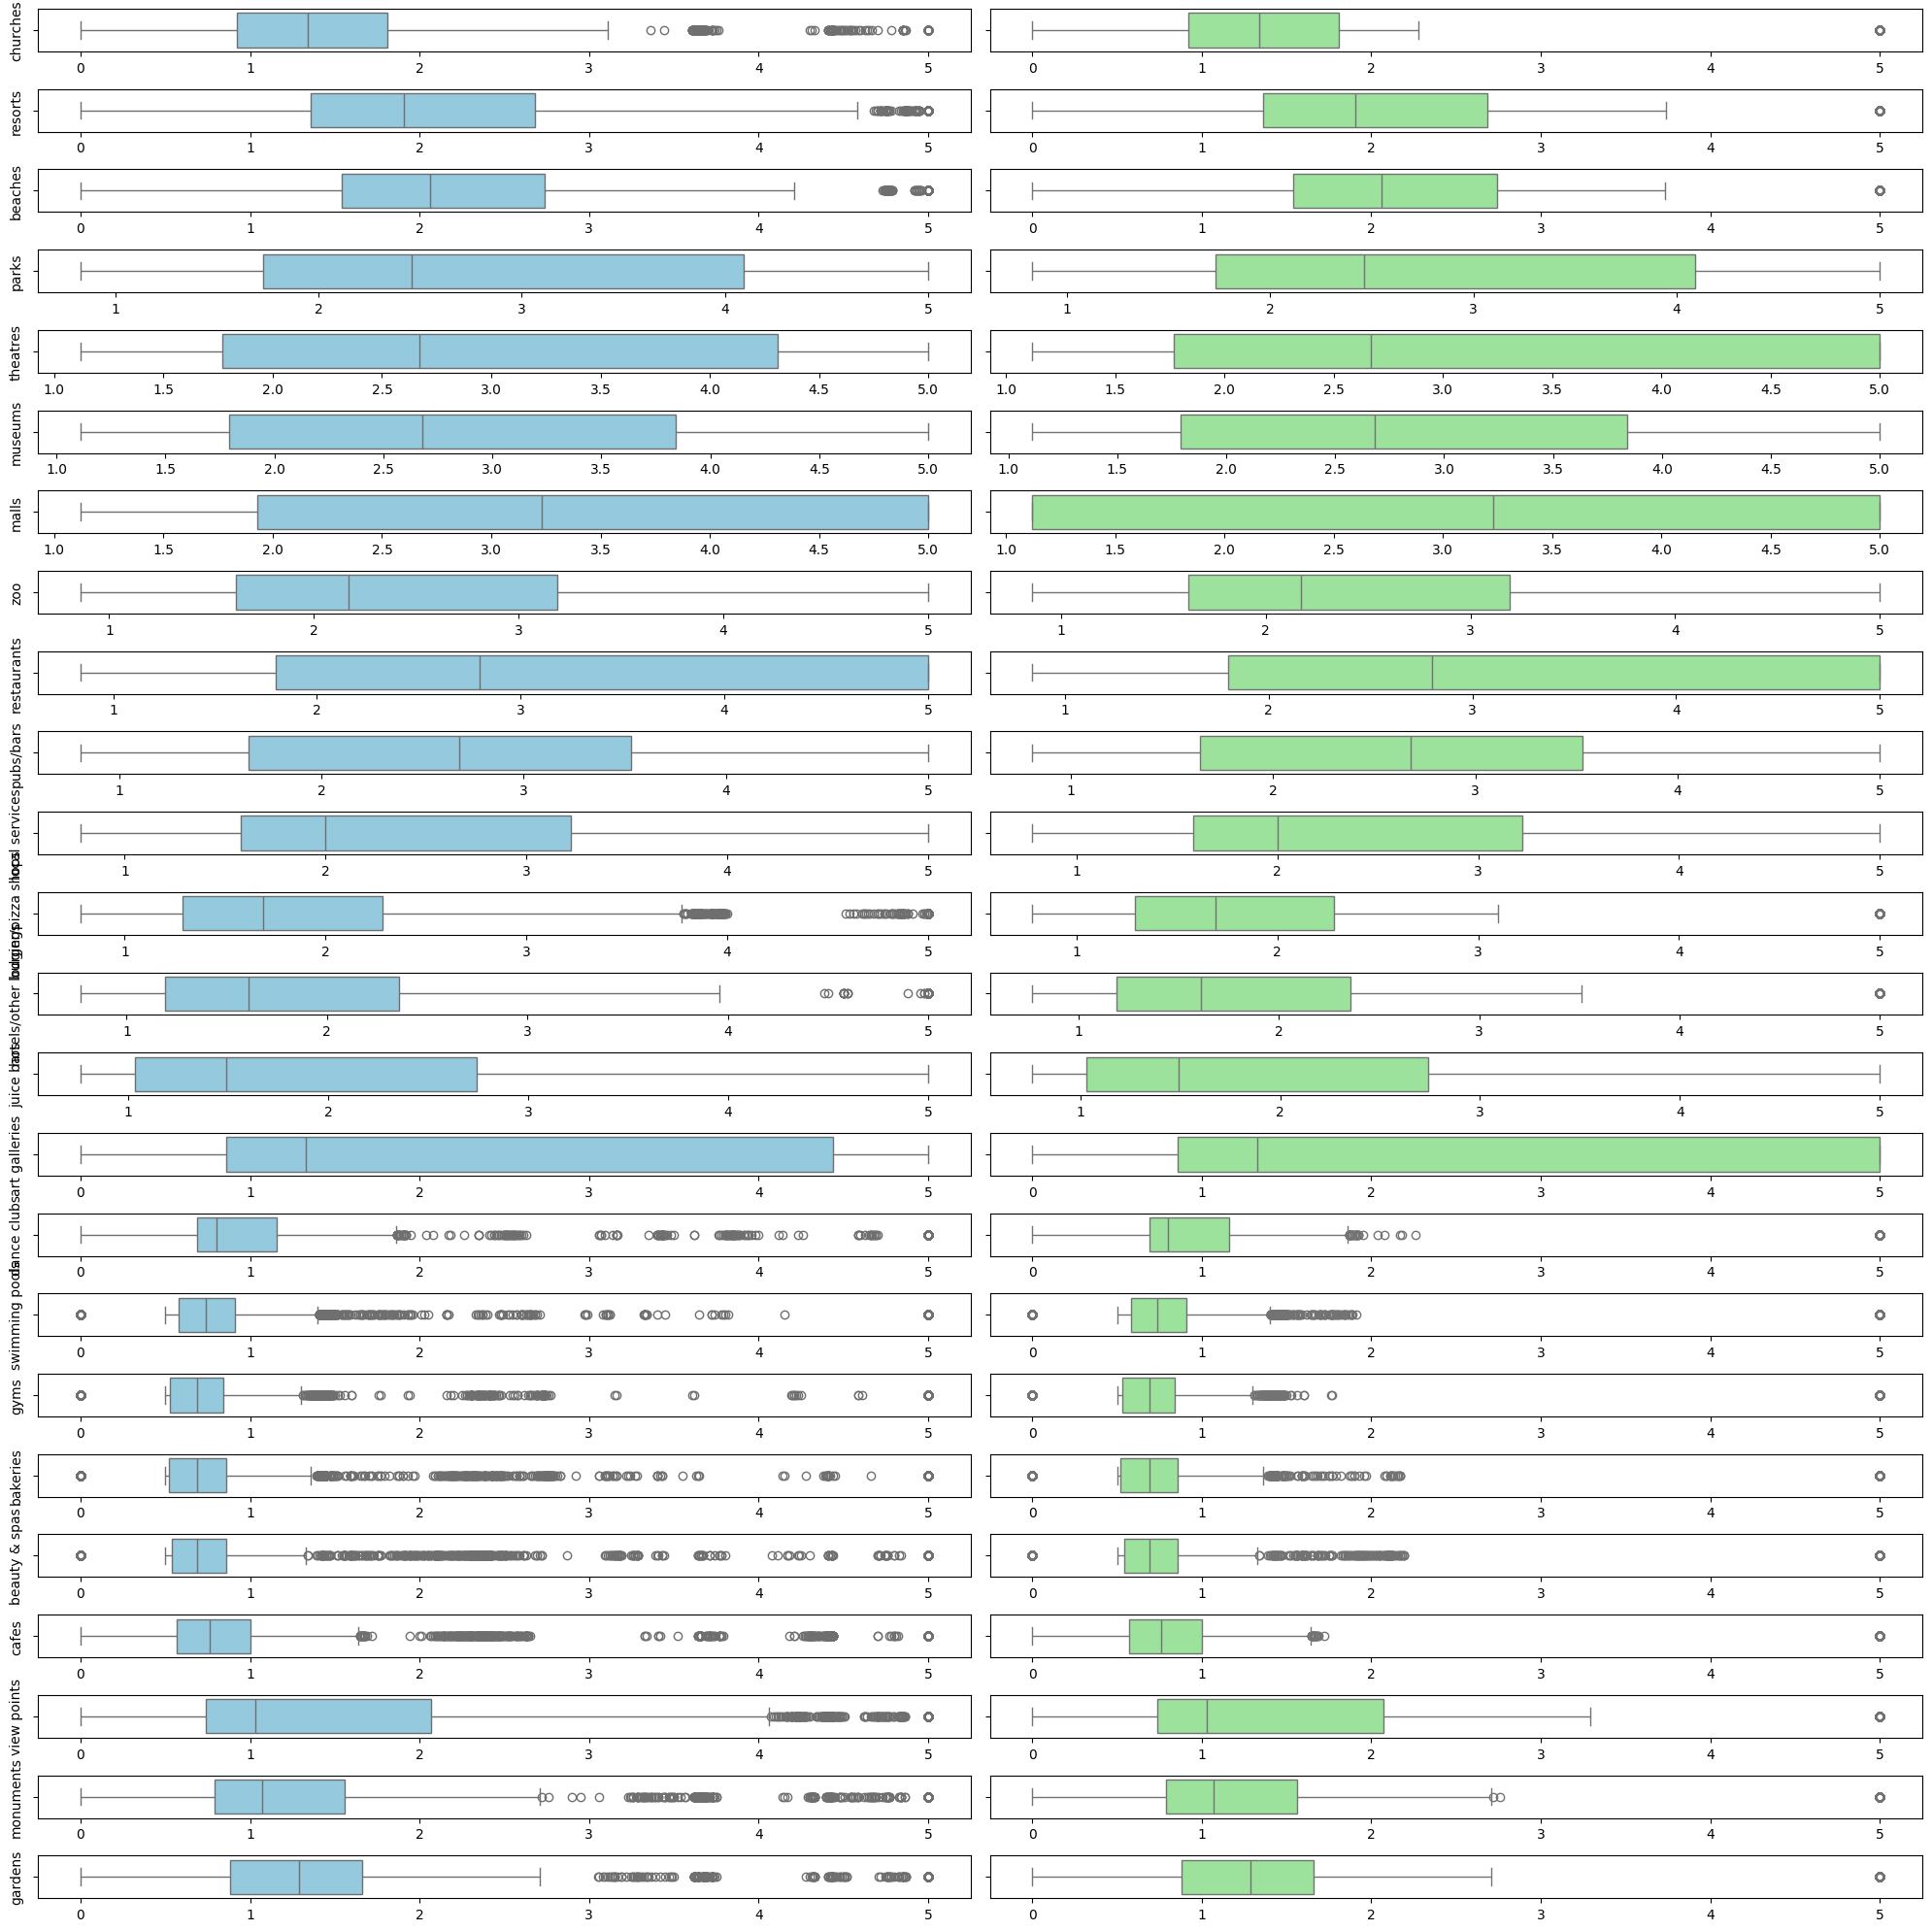

In [24]:
fig, axes = plt.subplots(24, 2, figsize=(20, 20))

for i, variable in enumerate(df):
    sns.boxplot(data=df, x=variable, ax=axes[i, 0], color='skyblue')
    sns.boxplot(data=df2, x=variable, ax=axes[i, 1], color='lightgreen')

    if i < len(df) - 1:
        axes[i, 0].set_xlabel('')
        axes[i, 1].set_xlabel('')
    else:
        axes[i, 0].set_xlabel('Boxplot antes de winsorizar')
        axes[i, 1].set_xlabel('Boxplot después de winsorizar')

    axes[i, 0].set_ylabel(variable)
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

## <font color='157699'> Escalado de variables </font>

In [25]:
scaler = StandardScaler()
df2[df2.columns] = scaler.fit_transform(df2[df2.columns])
df2.head()

churches   resorts  beaches     parks  theatres   museums     malls  \
0 -1.243109 -1.480619  0.86019  0.619735  1.468397  0.042017  1.126299   
1 -1.243109 -1.480619  0.86019  0.619735  1.468397  0.042017  1.126299   
2 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   
3 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   
4 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   

        zoo  restaurants  pubs/bars  ...  art galleries  dance clubs  \
0 -0.175791    -0.418544  -0.089770  ...      -0.273508    -0.533204   
1  0.043707    -0.418544  -0.082633  ...      -0.273508    -0.533204   
2  0.043707    -0.418544  -0.089770  ...      -0.273508    -0.533204   
3 -0.175791    -0.418544  -0.089770  ...      -0.273508    -0.533204   
4  0.043707    -0.418544  -0.089770  ...      -0.273508    -0.533204   

   swimming pools      gyms  bakeries  beauty & spas     cafes  view points  \
0        -0.45191 -0.794306 -0.401231      -0.781648 -0.873325    -1.069184   
1        -0.45191 -0.794306 -0.401231      -0.781648 -0.873325    -1.069184   
2        -0.45191 -0.794306 -0.401231      -0.781648 -0.873325    -1.069184   
3        -0.45191 -0.794306 -0.401231      -0.781648 -0.873325    -1.069184   
4        -0.45191 -0.794306 -0.401231      -0.781648 -0.873325    -1.069184   

   monuments   gardens  
0  -1.114306 -1.276926  
1  -1.114306 -1.276926  
2  -1.114306 -1.276926  
3  -1.114306 -1.276926  
4  -1.114306 -1.276926  

[5 rows x 24 columns]

## <font color='157699'> Reducción de Dimensionalidad </font>

In [26]:
pca = PCA(n_components=0.55).fit(df2)

#Veamos cuántas componentes ha conservado PCA:
pca.n_components_

5

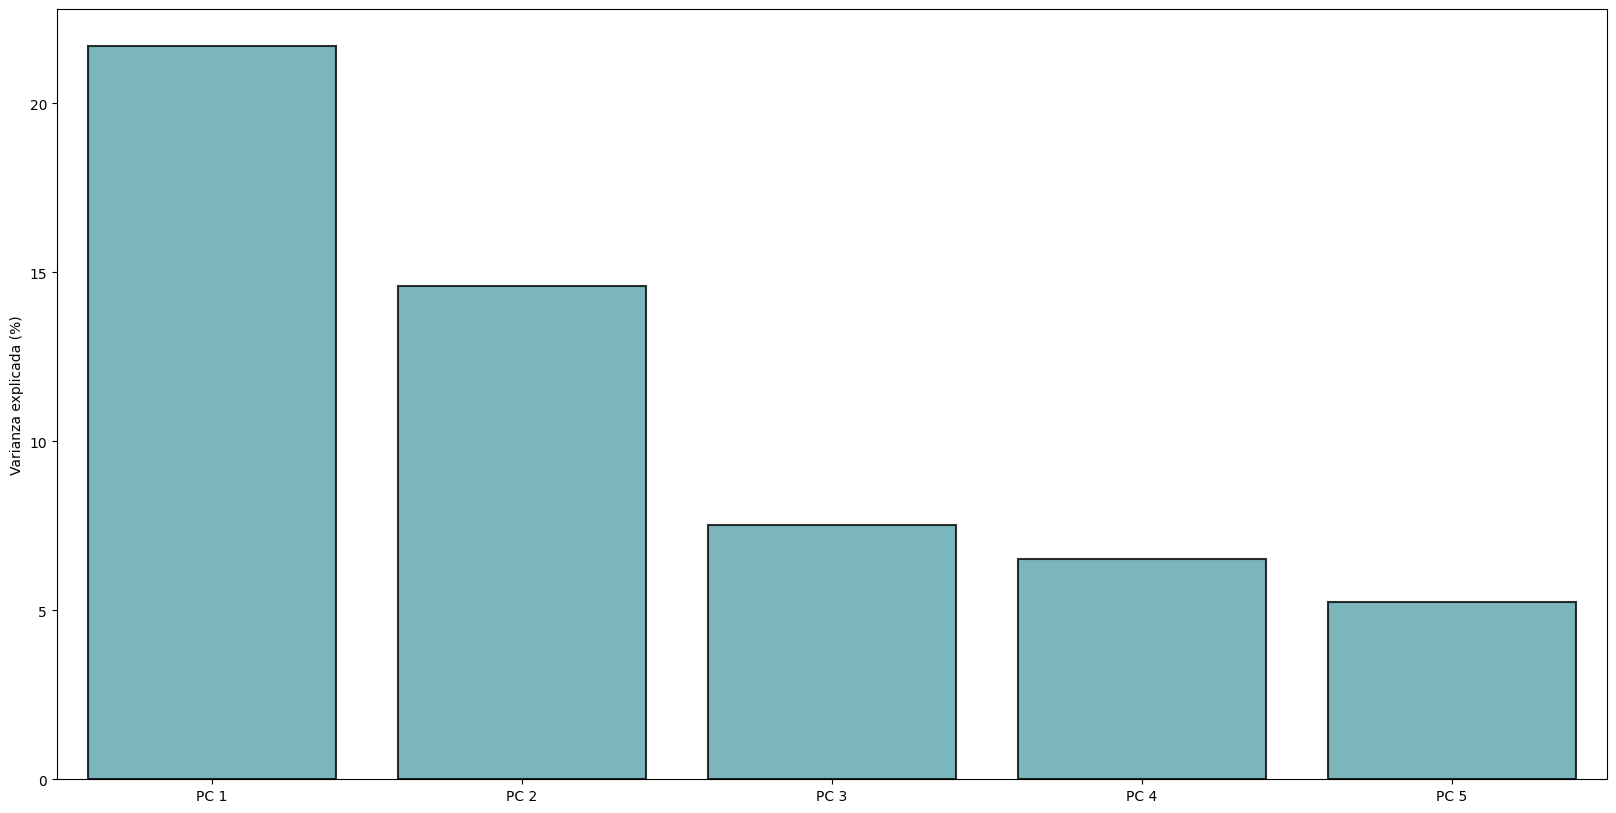

In [27]:
# --- Varianza explicada ---
PCA_variance = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})

fig, ax = plt.subplots(1, 1, figsize = (20, 10))

bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, 6)],
                  y = PCA_variance['Varianza explicada (%)'],
                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',
                  alpha = 0.8)

plt.show()

In [28]:
PCA_variance

Varianza explicada (%)
0               21.699740
1               14.607052
2                7.528084
3                6.520131
4                5.240604

In [29]:
#Por último, transforme "df2" de 24 columnas X_pca
X_pca = pca.fit_transform(df2)
X_pca

array([[-1.91607276, -1.54576254,  1.6541392 , -0.66577532,  0.58716039],
       [-1.97790708, -1.56091059,  1.57713011, -0.66722109,  0.5974347 ],
       [-1.9769594 , -1.55585356,  1.57633114, -0.67045682,  0.59473489],
       ...,
       [ 3.77019335, -1.51385618,  0.41678144, -0.91738007, -1.12235307],
       [ 3.63345513, -0.90471578,  0.52294934, -1.54487474, -1.16085005],
       [ 3.59843584, -1.61965633,  0.30822511, -1.12705909, -1.08751126]])

In [30]:
X_pca.shape

(5456, 5)

## <font color='157699'> Clustering Algorithm: K-Means </font>

In [31]:
# Número optimo de K
inertia_list = []

for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 100, max_iter = 100, random_state=3)
    kmeans.fit(df2)
    inertia_list.append(kmeans.inertia_)

In [32]:
# métricas para saber qué tan cohesionados están los clusters

print('el valor del SSE más bajo: \n', kmeans.inertia_) # 

print('\n coordenadas de los centroides: \n', kmeans.cluster_centers_)

print('\n número de iteraciones necesarias para converger: \n', kmeans.n_iter_)

el valor del SSE más bajo: 
 90715.5395091095

 coordenadas de los centroides: 
 [[-0.37198612 -0.07374006 -0.42062844 -0.45541034 -0.36203614  0.12941873
   0.63113746  0.92330925  0.91752466  0.74054868  0.42133511 -0.10430146
  -0.14103237  0.02943055  0.09156834 -0.2353158  -0.3110479  -0.32531231
  -0.37199008 -0.30100142 -0.31363837 -0.41964316 -0.40788551 -0.34320839]
 [-0.69034419 -0.87500778 -0.61716828 -0.85162432 -0.91955427 -0.88580337
  -0.24348796 -0.43529983 -0.05663028  0.07105416  0.41930529  1.33905962
   1.43977983  1.49887336  0.99435065  0.210019    0.32429044  0.05301808
   0.09529244 -0.0963677  -0.30809277 -0.61831514 -0.62410628 -0.60749701]
 [ 1.3835827   0.23668332 -0.06467284 -0.45134178 -0.66032645 -0.80790709
  -0.95357869 -0.94422916 -1.09588886 -0.98617854 -0.69159192 -0.50905263
  -0.42076614 -0.21172612  0.05410286  0.44554485  0.91775252  1.31900077
   1.36785815  1.10920859  1.32908145  0.73354924  0.8989361   1.08837423]
 [-0.01429116  0.25967653  0

En este caso obtuvimos un SSE de 90715.5395091095 este dato lo tendremos en cuenta para una comparación más adelante

Las coordenadas de los centroides nos  indican la posición en el espacio de características de cada uno de los centroides de los clusters.  Por ejemplo, si una coordenada es alta para una característica específica, eso significa que esa característica tiene un impacto significativo en la definición de ese cluster.

 número de iteraciones necesarias para converger: Este valor nos  indica cuántas iteraciones tomó para que el algoritmo K-means convergiera. en este caso el numero de interaciones fue 15.

In [33]:
kmeans.labels_

array([3, 3, 3, ..., 3, 2, 3])

In [34]:
label = kmeans.fit_predict(df2)
print(label[:999])

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 0 0 0 3 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 0 0 3 0 0 0 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0
 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 0 0 0 3 3 3 0 0 0 0 0 1 0 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3
 3 3 3 1 3 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 3 3 3 3 3 0 0 0 0 0 0 0 3 3 3 0 0
 0 0 0 3 0 0 0 0 0 0 3 0 0 0 3 3 3 0 3 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

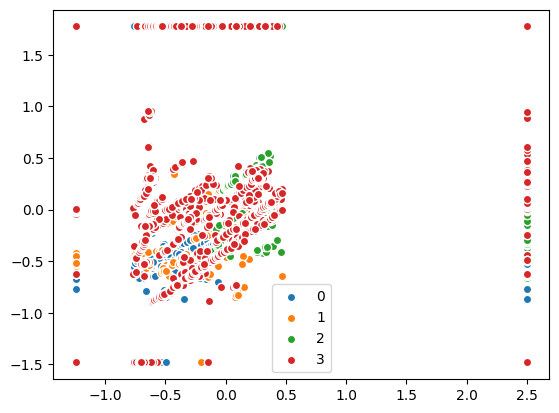

In [35]:
# Obtener valores únicos de cluster
u_labels = np.unique(label)

# Diagramar el resultado
for i in u_labels:
    plt.scatter(df2.loc[label == i, df2.columns[0]],
                df2.loc[label == i, df2.columns[1]],
                label=i, edgecolor='white')
plt.legend()
plt.show()


se varió en múltiples ocasiones el número de k para determianr cuál era en óptimo, sin embargo es como un valor de k = 4 que no se presentan mayores dificultades a la hora de generar el gráfico.

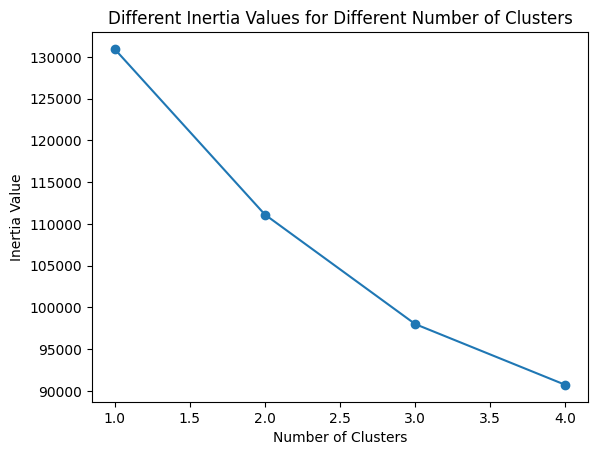

In [36]:
# plot the inertia curve
plt.plot(range(1,5),inertia_list)
plt.scatter(range(1,5),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

La grafica nos da una idea de cuantos cluster es el numero ideal para estos datos, sin embargo para una mayor precisión emplearemos un código que nos indica el número exacto de clusters.

In [37]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 5),
                 inertia_list, curve="convex",
                 direction="decreasing")
kl.elbow

Empleando el código anterior, nos muestra que los clusters ideales para este caso, son 4, este número lo tendremos en cuenta para los siguientes analisis de K-means.

In [38]:
kmeans_constants = {"init": "k-means++", "n_init": 1000,
                    "max_iter": 5000, "random_state": 42}

# --- Modelo K-means ---
model_kmeans = KMeans(n_clusters = 4, **kmeans_constants)
model_kmeans.fit(df2)

KMeans(max_iter=5000, n_clusters=4, n_init=1000, random_state=42)

In [39]:
# --- Evaluación del modelo kmeans ---
print(" ### K-MEANS ###")
print('Inertia: ', model_kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(df2, model_kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(df2, model_kmeans.labels_))

 ### K-MEANS ###
Inertia:  90715.5395091095
Silhouette Score:  0.14182661012500977
Calinski harabasz score:  805.9095783852654


Inertia: Esta métrica es la suma de las distancias al cuadrado de cada punto de datos dentro de su cluster correspondiente. Cuanto más pequeño sea el valor de inercia, más compactos y cohesivos serán los clusters. Este número lo tendremos en cuenta para una futura comparación.

Silhouette Score: Esta métrica cuantifica qué tan bien están separados los clusters. Toma en cuenta tanto la cohesión dentro de los clusters como la separación entre los clusters. En nuestro caso nos dió un valor de 0.14182661012500977 que tendremos en cuenta para compararlo despues de aplicarle PCA.

Calinski-Harabasz Score: Esta métrica también evalúa la cohesión dentro de los clusters y la separación entre los clusters. Un valor más alto de Calinski-Harabasz Score indica clusters más densos y bien separados. En nuestro caso nos dió un valor de 805.9095783852654, el cual tendremos en cuenta para compararlo despues de aplicarle PCA.

In [40]:
# Predicción de los clusters
Cluster_1 = model_kmeans.fit_predict(df2)
Cluster_1

array([0, 0, 0, ..., 0, 1, 0])

In [41]:
# Vamos a adjuntar 'Cluster_1' como una nueva variable a 'train_df1_out':
df_final = df2.copy()
df_final['Cluster_1']= Cluster_1

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head()

churches   resorts  beaches     parks  theatres   museums     malls  \
0 -1.243109 -1.480619  0.86019  0.619735  1.468397  0.042017  1.126299   
1 -1.243109 -1.480619  0.86019  0.619735  1.468397  0.042017  1.126299   
2 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   
3 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   
4 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   

        zoo  restaurants  pubs/bars  ...  dance clubs  swimming pools  \
0 -0.175791    -0.418544  -0.089770  ...    -0.533204        -0.45191   
1  0.043707    -0.418544  -0.082633  ...    -0.533204        -0.45191   
2  0.043707    -0.418544  -0.089770  ...    -0.533204        -0.45191   
3 -0.175791    -0.418544  -0.089770  ...    -0.533204        -0.45191   
4  0.043707    -0.418544  -0.089770  ...    -0.533204        -0.45191   

       gyms  bakeries  beauty & spas     cafes  view points  monuments  \
0 -0.794306 -0.401231      -0.781648 -0.873325    -1.069184  -1.114306   
1 -0.794306 -0.401231      -0.781648 -0.873325    -1.069184  -1.114306   
2 -0.794306 -0.401231      -0.781648 -0.873325    -1.069184  -1.114306   
3 -0.794306 -0.401231      -0.781648 -0.873325    -1.069184  -1.114306   
4 -0.794306 -0.401231      -0.781648 -0.873325    -1.069184  -1.114306   

    gardens  Cluster_1  
0 -1.276926          0  
1 -1.276926          0  
2 -1.276926          0  
3 -1.276926          0  
4 -1.276926          0  

[5 rows x 25 columns]

In [42]:
df_final.Cluster_1.value_counts()

Cluster_1
0    2069
3    1835
1     860
2     692
Name: count, dtype: int64

Distribución de los clusters: Se puede ver la cantidad de puntos de datos asignados a cada cluster para entender su distribución, podemos evidenciar que el cluster 0 es el cluster dominante con la mayor cantidad de datos, sin embargo el cluster 3 se acerca al valor del cluster 0, por ultimo el cluster 1 y 2 tienen una cantidad proporcional entre ellos teniendo 860 y 692 datos respectivamente.

## <font color='157699'> K-Means con PCA 3 Componentes </font>

In [43]:
# Número optimo de K
inertia_list = []

for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(X_pca)
    inertia_list.append(kmeans.inertia_)

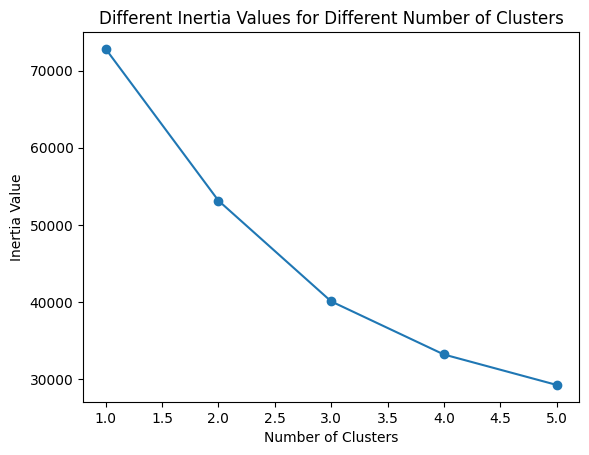

In [44]:
# plot the inertia curve
plt.plot(range(1,6),inertia_list)
plt.scatter(range(1,6),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

La grafica nos da una idea de cuantos cluster es el numero ideal para estos datos, sin embargo para una mayor precisión emplearemos un código que nos indica el número exacto de clusters.

In [45]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 6),
                 inertia_list, curve="convex",
                 direction="decreasing")

kl.elbow

3

Empleando el código anterior, nos muestra que los clusters ideales para este caso, son 3, siendo un cluster menos que la versión sin PCA este número lo tendremos en cuenta para los siguientes analisis de K-means con PCA.

In [46]:
kmeans_constants = {"init": "k-means++", "n_init": 1000, "max_iter": 5000, "random_state": 42}

# --- Modelo K-means ---
model_kmeans_pca = KMeans(n_clusters = 3, **kmeans_constants)
model_kmeans_pca.fit(X_pca)

KMeans(max_iter=5000, n_clusters=3, n_init=1000, random_state=42)

In [47]:
# --- Evaluación del modelo kmeans ---
print(" ### K-MEANS ###")
print('Inertia: ', model_kmeans_pca.inertia_)
print('Silhouette Score: ', silhouette_score(X_pca, model_kmeans_pca.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(X_pca, model_kmeans_pca.labels_))

 ### K-MEANS ###
Inertia:  40114.48993834477
Silhouette Score:  0.27245161959515546
Calinski harabasz score:  2221.507327024097


Inertia: Esta métrica es la suma de las distancias al cuadrado de cada punto de datos dentro de su cluster correspondiente. Cuanto más pequeño sea el valor de inercia, más compactos y cohesivos serán los clusters. Este número lo tendremos en cuenta para una futura comparación, en este caso con PCA nos dió un valor de 40114.48993834478 y sin PCA nos dió 90715.5395091095, lo que nos puede concluir que los cluster son mas compactos y cohesivos con PCA.

Silhouette Score: Esta métrica cuantifica qué tan bien están separados los clusters. Toma en cuenta tanto la cohesión dentro de los clusters como la separación entre los clusters. En nuestro caso nos dió un valor de 0.14182661012500977 sin PCA y con PCA nos dió un valor de 0.2724516195951531, por lo cual evidenciamos una leve mejoría.

Calinski-Harabasz Score: Esta métrica también evalúa la cohesión dentro de los clusters y la separación entre los clusters. Un valor más alto de Calinski-Harabasz Score indica clusters más densos y bien separados. En nuestro caso nos dió un valor de 805.9095783852654 sin PCA y con PCA nos dió 2221.507327024097 por lo cual, con PCA el cluster es más denso y mejor separado.

In [48]:
# Predicción de los clusters
Cluster_2 = model_kmeans.fit_predict(X_pca)

df_final['Cluster_2']= Cluster_2

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head()

churches   resorts  beaches     parks  theatres   museums     malls  \
0 -1.243109 -1.480619  0.86019  0.619735  1.468397  0.042017  1.126299   
1 -1.243109 -1.480619  0.86019  0.619735  1.468397  0.042017  1.126299   
2 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   
3 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   
4 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   

        zoo  restaurants  pubs/bars  ...  swimming pools      gyms  bakeries  \
0 -0.175791    -0.418544  -0.089770  ...        -0.45191 -0.794306 -0.401231   
1  0.043707    -0.418544  -0.082633  ...        -0.45191 -0.794306 -0.401231   
2  0.043707    -0.418544  -0.089770  ...        -0.45191 -0.794306 -0.401231   
3 -0.175791    -0.418544  -0.089770  ...        -0.45191 -0.794306 -0.401231   
4  0.043707    -0.418544  -0.089770  ...        -0.45191 -0.794306 -0.401231   

   beauty & spas     cafes  view points  monuments   gardens  Cluster_1  \
0      -0.781648 -0.873325    -1.069184  -1.114306 -1.276926          0   
1      -0.781648 -0.873325    -1.069184  -1.114306 -1.276926          0   
2      -0.781648 -0.873325    -1.069184  -1.114306 -1.276926          0   
3      -0.781648 -0.873325    -1.069184  -1.114306 -1.276926          0   
4      -0.781648 -0.873325    -1.069184  -1.114306 -1.276926          0   

   Cluster_2  
0          2  
1          2  
2          2  
3          2  
4          2  

[5 rows x 26 columns]

In [49]:
df_final['Cluster_2'].value_counts()

Cluster_2
2    2115
0    1831
1     766
3     744
Name: count, dtype: int64

Distribución de los clusters: Se puede ver la cantidad de puntos de datos asignados a cada cluster para entender su distribución, podemos evidenciar que el cluster 0 es el cluster dominante con la mayor cantidad de datos tanto con PCA y sin PCA, sin embargo el cluster 3 se acerca al valor del cluster 0 en ambos caso, por ultimo el cluster 1 y 2 tienen una cantidad proporcional entre ellos teniendo 860 y 692 datos respectivamente sin PCA y con PCA se ve una cercanía aún más notoria, con 766 datos para el cluster 1 y 744 para el cluster 3.

Sin PCA:

Cluster_1

0   -  2069

3   -  1835

1   -   860

2   -   692

Con PCA:

2  -   2115

0   -  1831

1   -   766

3   -   744

Con PCA hubó un poco más de concentración en el cluster 2 comparandola con el cluster principal sin PCA que en ese caso, se llamaba 0.

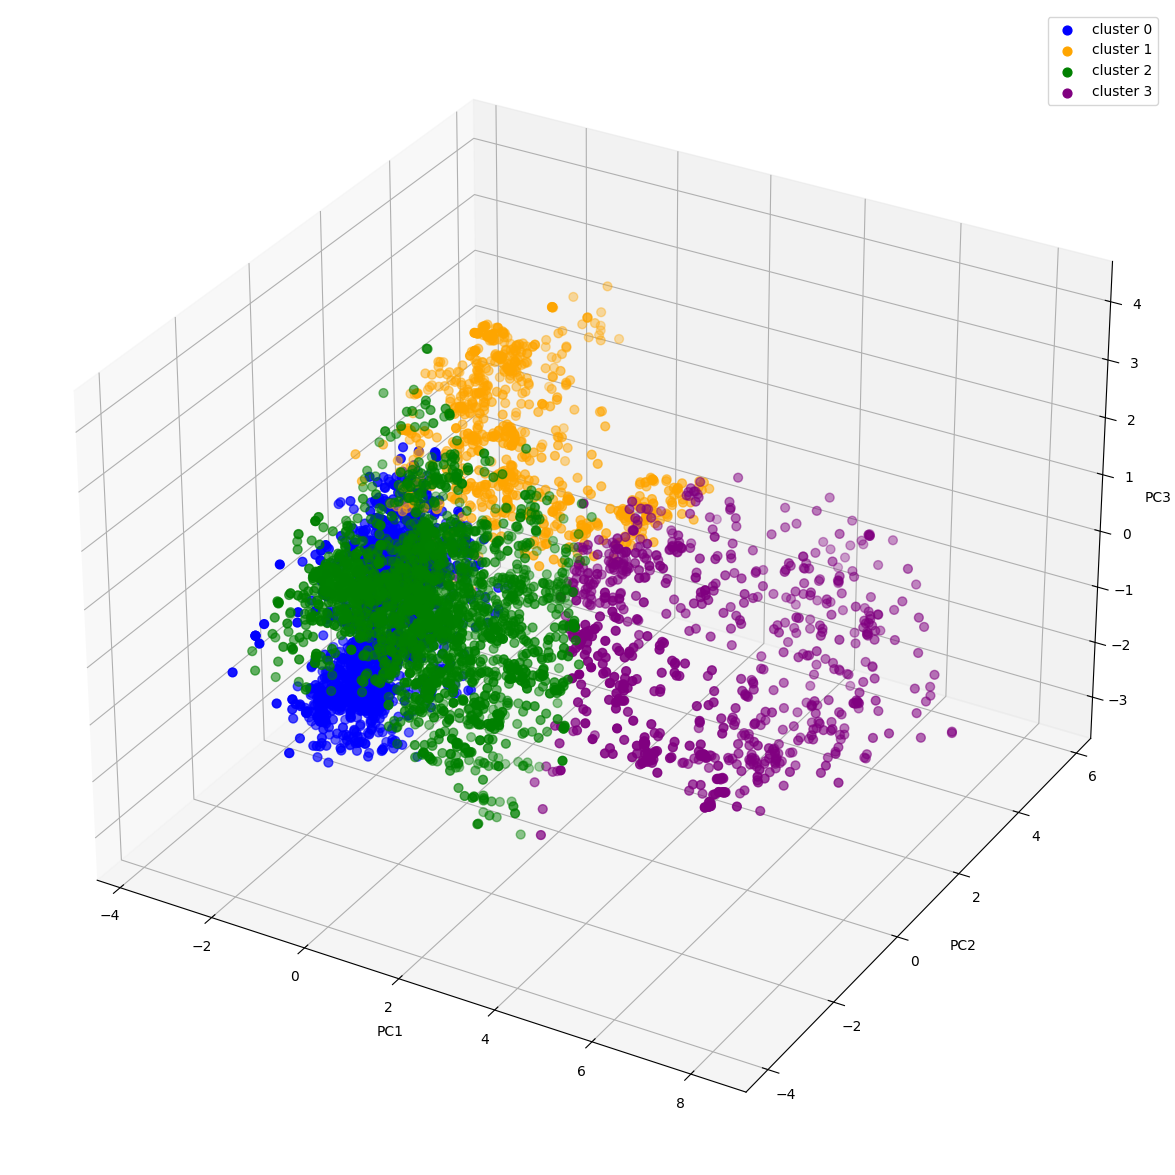

In [50]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[Cluster_2 == 0,0],X_pca[Cluster_2 == 0,1],X_pca[Cluster_2 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X_pca[Cluster_2 == 1,0],X_pca[Cluster_2 == 1,1],X_pca[Cluster_2 == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X_pca[Cluster_2 == 2,0],X_pca[Cluster_2 == 2,1],X_pca[Cluster_2 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X_pca[Cluster_2 == 3,0],X_pca[Cluster_2 == 3,1],X_pca[Cluster_2 == 3,2], s = 40 , color = 'purple', label = "cluster 3")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

En esta gráfica podemos observar la agrupación de los cluster con su respectivo color, podemos visualizar que no se evidencia solapamiento y la agrupación por clusters está compacta o bien relacionada. 

In [51]:
df_final.head()

churches   resorts  beaches     parks  theatres   museums     malls  \
0 -1.243109 -1.480619  0.86019  0.619735  1.468397  0.042017  1.126299   
1 -1.243109 -1.480619  0.86019  0.619735  1.468397  0.042017  1.126299   
2 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   
3 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   
4 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   

        zoo  restaurants  pubs/bars  ...  swimming pools      gyms  bakeries  \
0 -0.175791    -0.418544  -0.089770  ...        -0.45191 -0.794306 -0.401231   
1  0.043707    -0.418544  -0.082633  ...        -0.45191 -0.794306 -0.401231   
2  0.043707    -0.418544  -0.089770  ...        -0.45191 -0.794306 -0.401231   
3 -0.175791    -0.418544  -0.089770  ...        -0.45191 -0.794306 -0.401231   
4  0.043707    -0.418544  -0.089770  ...        -0.45191 -0.794306 -0.401231   

   beauty & spas     cafes  view points  monuments   gardens  Cluster_1  \
0      -0.781648 -0.873325    -1.069184  -1.114306 -1.276926          0   
1      -0.781648 -0.873325    -1.069184  -1.114306 -1.276926          0   
2      -0.781648 -0.873325    -1.069184  -1.114306 -1.276926          0   
3      -0.781648 -0.873325    -1.069184  -1.114306 -1.276926          0   
4      -0.781648 -0.873325    -1.069184  -1.114306 -1.276926          0   

   Cluster_2  
0          2  
1          2  
2          2  
3          2  
4          2  

[5 rows x 26 columns]

In [52]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_pca)
df_final[['PCA1', 'PCA2', 'PCA3']] = principal_components

df_final['Cluster_1'] = df_final['Cluster_1'].astype('category')

fig = px.scatter_3d(df_final, x="PCA1", y="PCA2", z="PCA3", color="Cluster_1")
fig.update_traces(marker=dict(line=dict(color='white', width=2)))
fig.update_layout(width=1000, height=700)
fig.show()

La gráfica anterior es una muestra más interactiva de la scatterplot o diagrama de dispercion inicial, donde podemos comprobar la buena agrupación que tuvieron los clusters y evidenciamos que no presentan solapamiento.

---

In [53]:
scaled_features = X_pca.copy()

min_clusters = 2
max_clusters = 5

inertia_values = []
silhouette_scores = []

for i in range(min_clusters, max_clusters+1):

    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(scaled_features)
    
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))



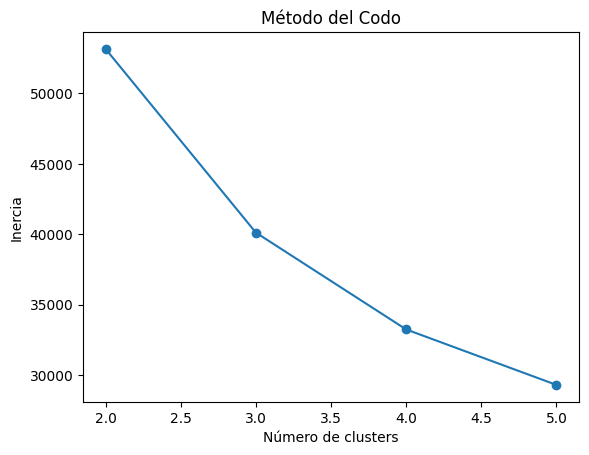

In [54]:
plt.plot(range(min_clusters, max_clusters+1), inertia_values, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

La grafica nos da una idea de cuantos cluster es el numero ideal para estos datos, ésta vez con 2 componentes, sin embargo para una mayor precisión emplearemos un código que nos indica el número exacto de clusters.

In [55]:
optimal_n_clusters = 3

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

## Clustering: DBSCAN

### Dataset Original

In [56]:
from sklearn.neighbors import NearestNeighbors

# --- Selección de hiperparámetros eps ---

# --- Gráfica de distancias K --
neighbors = NearestNeighbors(n_neighbors = 2)
neighbors.fit(df2)

distances, *other = neighbors.kneighbors(df2)
distances = distances[:, 1]
print(distances.shape)
distances = np.sort(distances, axis = 0)

(5456,)


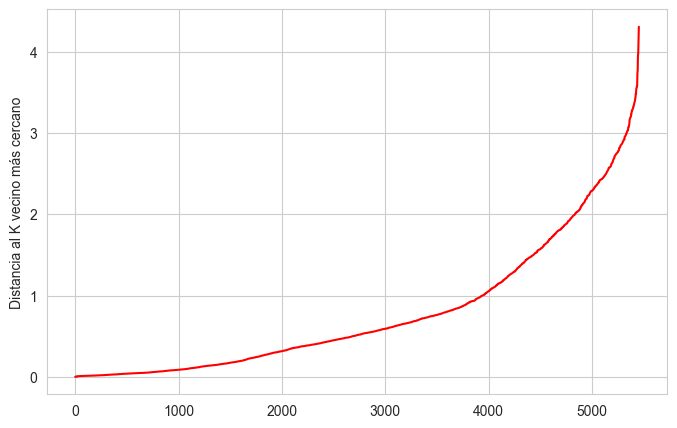

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo de Seaborn
sns.set_style('whitegrid')  # Puedes elegir cualquier estilo de Seaborn aquí

# Tu código para trazar la gráfica
plt.figure(figsize=(8, 5))
plt.plot(distances, color='red')
plt.ylabel('Distancia al K vecino más cercano')
plt.show()


In [58]:
# --- Selección del punto de curvatura máxima ---
kl = KneeLocator(range(len(distances)), distances, curve = 'convex', direction = 'increasing')
kl.elbow

5403

In [59]:
# --- Epsilon óptimo --
epsilon = distances[kl.elbow]
epsilon

3.3226701588533705

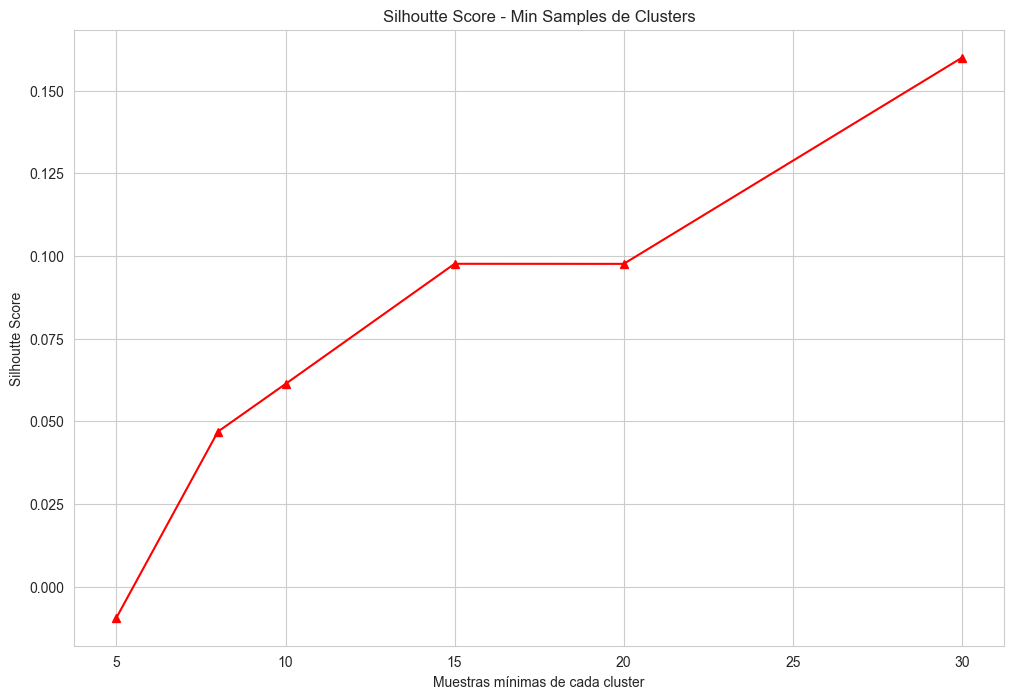

In [60]:
# --- Selección de hiperparámetros min_sample ---
silhoutte_coefs = []

for min_points in [5, 8, 10, 15, 20, 30]:
    model_d = DBSCAN(eps = epsilon, min_samples = min_points)
    model_d.fit(df2)
    silhoutte_coefs.append(silhouette_score(df2, model_d.labels_))

plt.figure(figsize = (12, 8))
plt.plot([5, 8, 10, 15, 20, 30], silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Muestras mínimas de cada cluster')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Min Samples de Clusters')
plt.show()

In [61]:
# --- Modelo DBSCAN ---
model_db_pca = DBSCAN(eps = epsilon, min_samples = 30)
model_db_pca.fit(df2)

DBSCAN(eps=3.3226701588533705, min_samples=30)

In [62]:
# --- Evaluación del modelo DBSCAN ---
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(df2, model_db_pca.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(df2, model_db_pca.labels_))

 ### DBSCAN ###
Silhouette Score:  0.15991585260174804
Calinski harabasz score:  161.13441727216238


In [63]:
# Predicción de los clusters
Cluster_3 = model_db_pca.fit_predict(df2)

df_final['Cluster_3']= Cluster_3

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

churches   resorts  beaches     parks  theatres   museums     malls  \
0 -1.243109 -1.480619  0.86019  0.619735  1.468397  0.042017  1.126299   
1 -1.243109 -1.480619  0.86019  0.619735  1.468397  0.042017  1.126299   
2 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   

        zoo  restaurants  pubs/bars  ...     cafes  view points  monuments  \
0 -0.175791    -0.418544  -0.089770  ... -0.873325    -1.069184  -1.114306   
1  0.043707    -0.418544  -0.082633  ... -0.873325    -1.069184  -1.114306   
2  0.043707    -0.418544  -0.089770  ... -0.873325    -1.069184  -1.114306   

    gardens  Cluster_1  Cluster_2      PCA1      PCA2      PCA3  Cluster_3  
0 -1.276926          0          2 -1.916073 -1.545763  1.654139          0  
1 -1.276926          0          2 -1.977907 -1.560911  1.577130          0  
2 -1.276926          0          2 -1.976959 -1.555854  1.576331          0  

[3 rows x 30 columns]

In [64]:
df_final['Cluster_3'].value_counts()

Cluster_3
 0    4707
-1     635
 1      84
 2      30
Name: count, dtype: int64

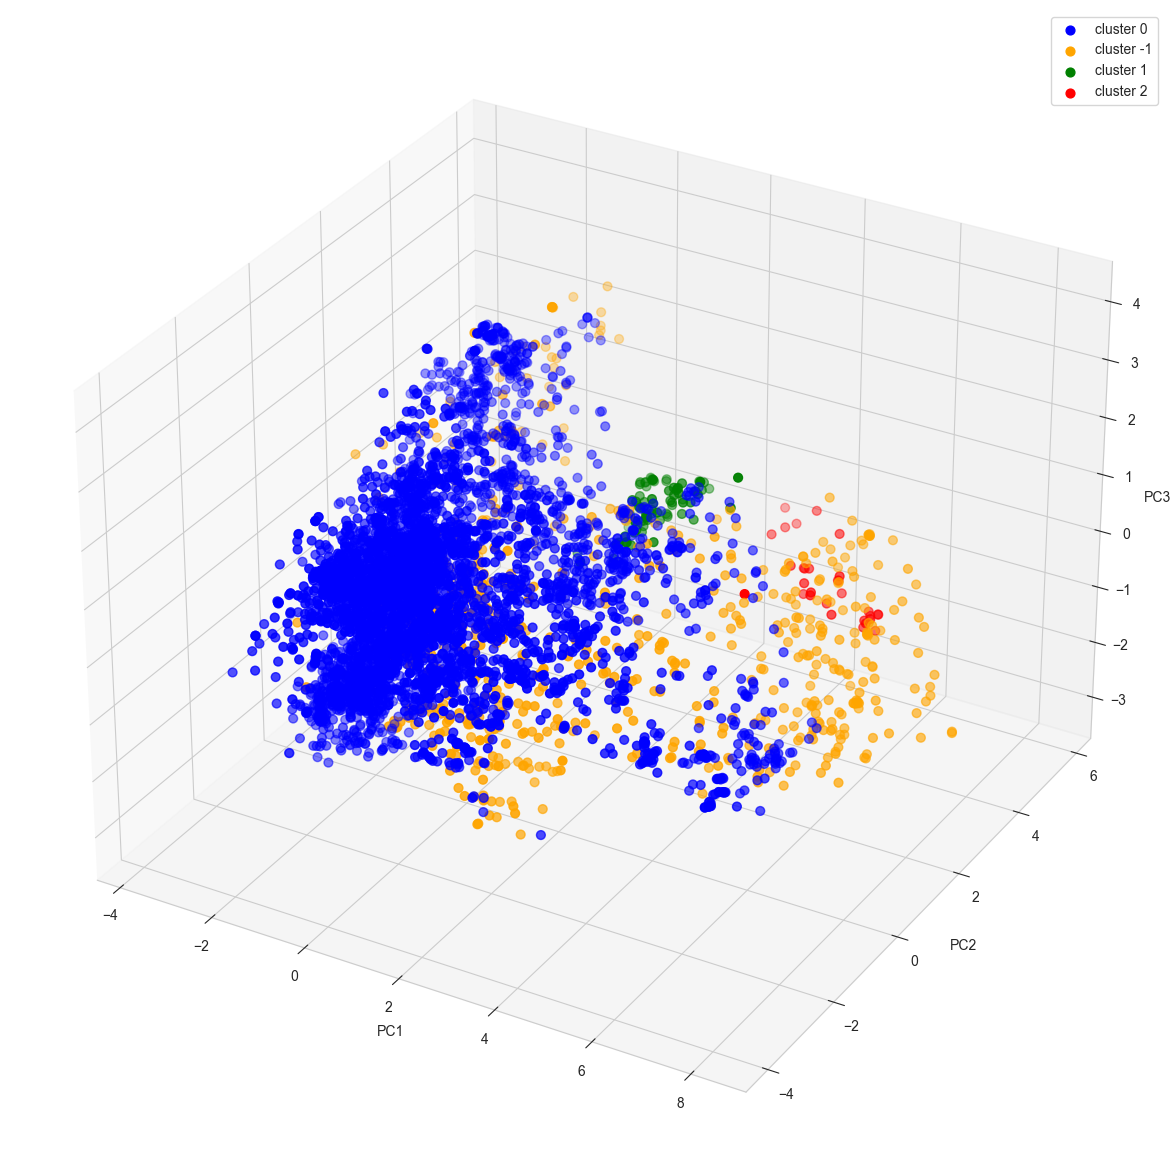

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(X, cluster_labels):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    colors = {0: 'blue', -1: 'orange', 1: 'green', 2: 'red', 3: 'purple', 4: 'yellow', 5: 'cyan', 6: 'magenta', 7: 'brown'}  # Asigna colores a cada clúster
    for cluster_label, color in colors.items():
        if cluster_label in cluster_labels:
            ax.scatter(X[cluster_labels == cluster_label, 0], X[cluster_labels == cluster_label, 1], X[cluster_labels == cluster_label, 2], s=40, color=color, label=f'cluster {cluster_label}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.legend()
    plt.show()

# Cluster_4 contiene los etiquetas de los clústeres
plot_3d_scatter(X_pca, Cluster_3)

### Dataset Reducido

In [66]:
# --- Selección de hiperparámetros eps ---

# --- Gráfica de distancias K --
neighbors = NearestNeighbors(n_neighbors = 2)
neighbors.fit(X_pca)

distances, *other = neighbors.kneighbors(X_pca)
distances = distances[:, 1]
print(distances.shape)
distances = np.sort(distances, axis = 0)
distances

(5456,)


array([0.        , 0.        , 0.        , ..., 1.66355162, 1.6676629 ,
       1.74266322])

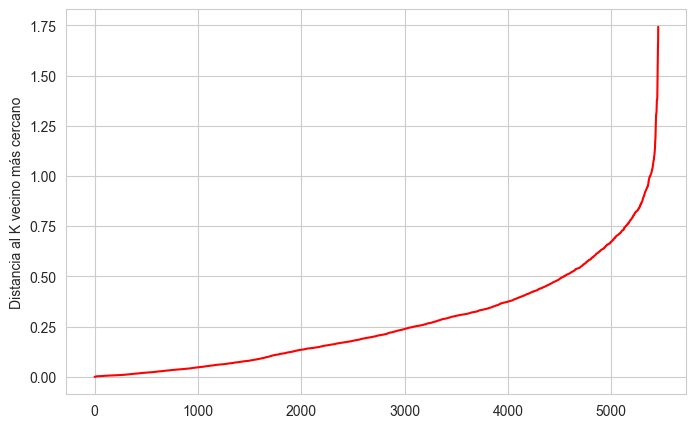

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo de Seaborn
sns.set_style('whitegrid')  # Puedes elegir cualquier estilo de Seaborn aquí

# Tu código para trazar la gráfica
plt.figure(figsize=(8, 5))
plt.plot(distances, color='red')
plt.ylabel('Distancia al K vecino más cercano')
plt.show()

In [68]:
# --- Selección del punto de curvatura máxima ---
kl = KneeLocator(range(len(distances)), distances, curve = 'convex', direction = 'increasing')
kl.elbow

5408

In [69]:
# --- Epsilon óptimo --
epsilon = distances[kl.elbow]
epsilon

1.0705762520346274

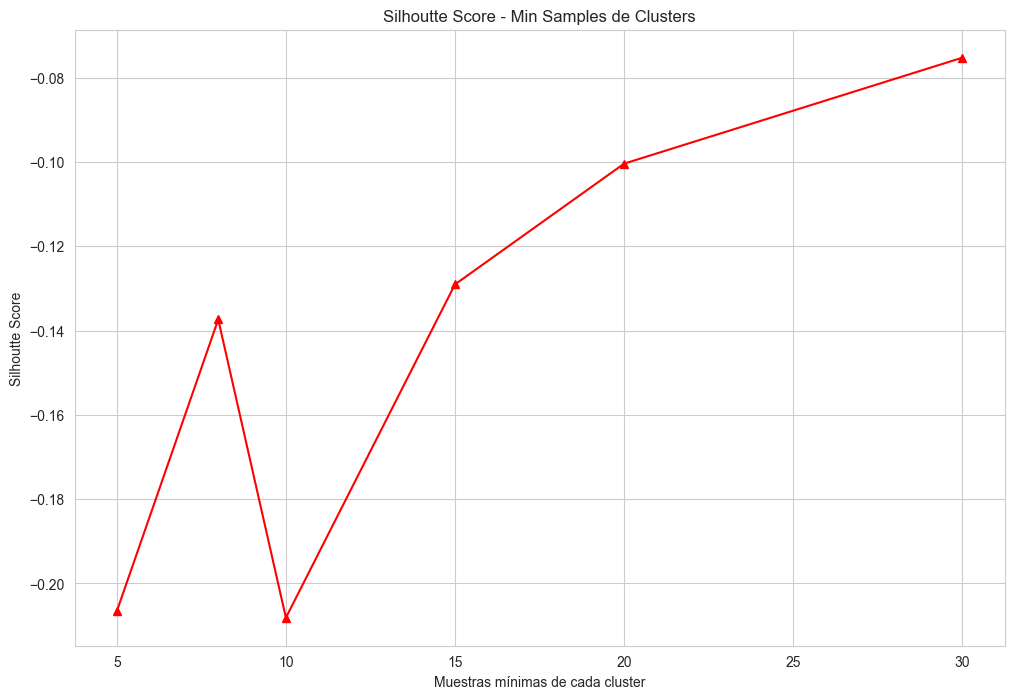

In [70]:
# --- Selección de hiperparámetros min_sample ---
silhoutte_coefs = []

for min_points in [5, 8, 10, 15, 20, 30]:
    model_d = DBSCAN(eps = epsilon, min_samples = min_points)
    model_d.fit(X_pca)
    silhoutte_coefs.append(silhouette_score(X_pca, model_d.labels_))

plt.figure(figsize = (12, 8))
plt.plot([5, 8, 10, 15, 20, 30], silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Muestras mínimas de cada cluster')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Min Samples de Clusters')
plt.show()

In [71]:
# --- Modelo DBSCAN ---
model_db_pca = DBSCAN(eps = epsilon, min_samples = 30)
model_db_pca.fit(X_pca)

DBSCAN(eps=1.0705762520346274, min_samples=30)

In [72]:
# --- Evaluación del modelo DBSCAN ---
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(X_pca, model_db_pca.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(X_pca, model_db_pca.labels_))

 ### DBSCAN ###
Silhouette Score:  -0.07524578608949968
Calinski harabasz score:  290.094174199113


In [73]:
# Predicción de los clusters
Cluster_4 = model_db_pca.fit_predict(X_pca)

df_final['Cluster_4']= Cluster_4

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

churches   resorts  beaches     parks  theatres   museums     malls  \
0 -1.243109 -1.480619  0.86019  0.619735  1.468397  0.042017  1.126299   
1 -1.243109 -1.480619  0.86019  0.619735  1.468397  0.042017  1.126299   
2 -1.243109 -1.480619  0.86019  0.606055  1.468397  0.042017  1.126299   

        zoo  restaurants  pubs/bars  ...  view points  monuments   gardens  \
0 -0.175791    -0.418544  -0.089770  ...    -1.069184  -1.114306 -1.276926   
1  0.043707    -0.418544  -0.082633  ...    -1.069184  -1.114306 -1.276926   
2  0.043707    -0.418544  -0.089770  ...    -1.069184  -1.114306 -1.276926   

   Cluster_1  Cluster_2      PCA1      PCA2      PCA3  Cluster_3  Cluster_4  
0          0          2 -1.916073 -1.545763  1.654139          0          0  
1          0          2 -1.977907 -1.560911  1.577130          0          0  
2          0          2 -1.976959 -1.555854  1.576331          0          0  

[3 rows x 31 columns]

In [74]:
df_final['Cluster_4'].value_counts()

Cluster_4
 0    3887
-1     891
 4     274
 3     215
 1      57
 2      52
 6      43
 5      37
Name: count, dtype: int64

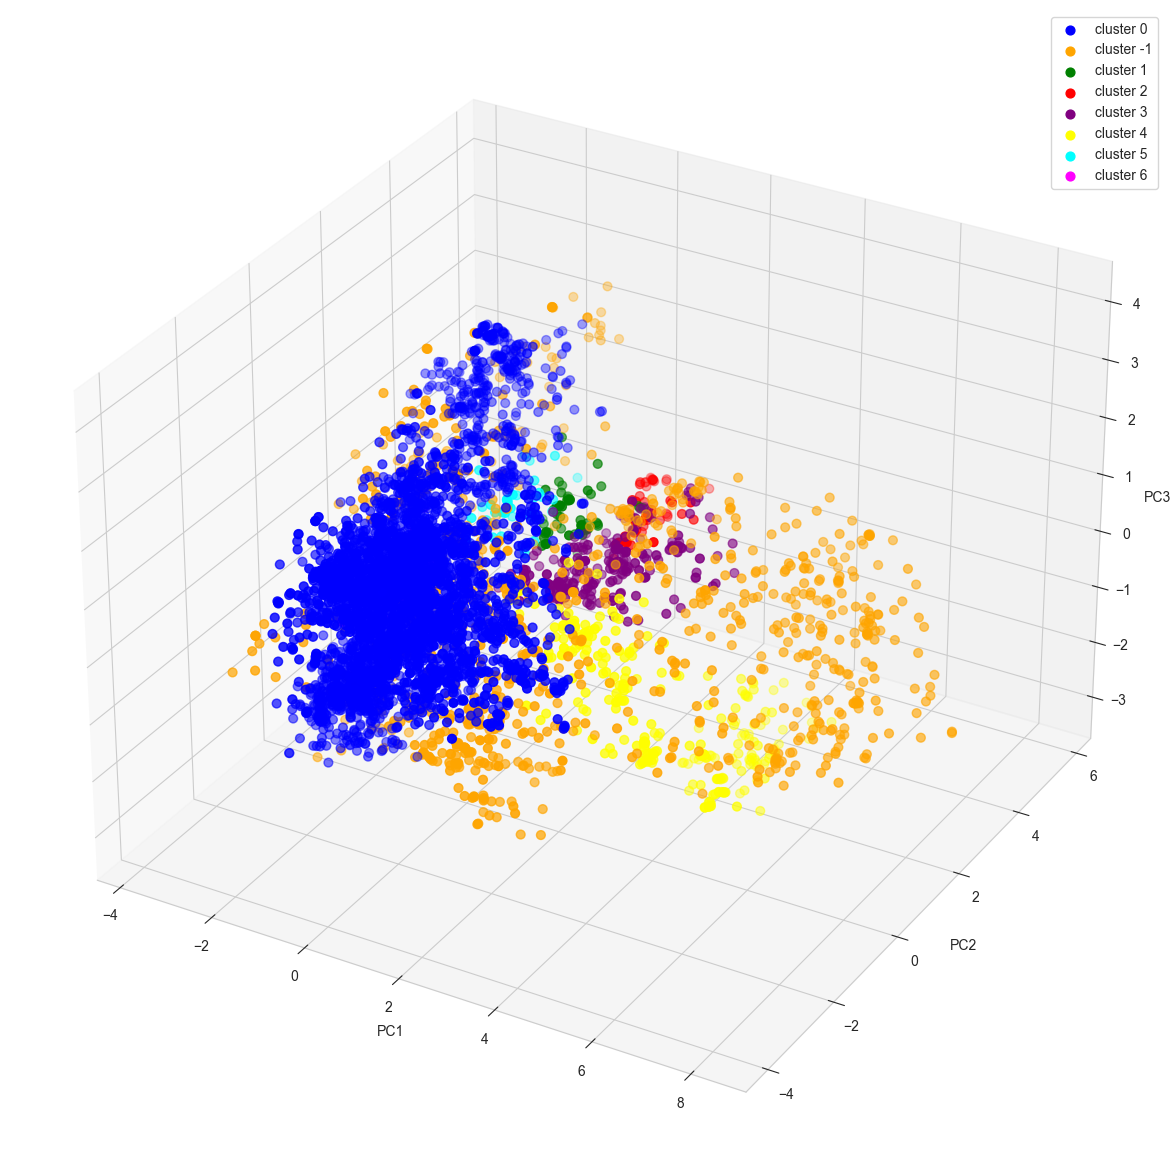

In [75]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(X, cluster_labels):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    colors = {0: 'blue', -1: 'orange', 1: 'green', 2: 'red', 3: 'purple', 4: 'yellow', 5: 'cyan', 6: 'magenta', 7: 'brown'}  # Asigna colores a cada clúster
    for cluster_label, color in colors.items():
        if cluster_label in cluster_labels:
            ax.scatter(X[cluster_labels == cluster_label, 0], X[cluster_labels == cluster_label, 1], X[cluster_labels == cluster_label, 2], s=40, color=color, label=f'cluster {cluster_label}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.legend()
    plt.show()

# Cluster_4 contiene los etiquetas de los clústeres
plot_3d_scatter(X_pca, Cluster_4)

# Interpretación de Cluster

In [76]:
df2.columns

Index(['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs/bars', 'local services',
       'burger/pizza shops', 'hotels/other lodgings', 'juice bars',
       'art galleries', 'dance clubs', 'swimming pools', 'gyms', 'bakeries',
       'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens'],
      dtype='object')

In [77]:
df_final_final = df_final[df2.columns]


In [78]:
df_final_final

churches   resorts   beaches     parks  theatres   museums     malls  \
0    -1.243109 -1.480619  0.860190  0.619735  1.468397  0.042017  1.126299   
1    -1.243109 -1.480619  0.860190  0.619735  1.468397  0.042017  1.126299   
2    -1.243109 -1.480619  0.860190  0.606055  1.468397  0.042017  1.126299   
3    -1.243109 -1.480619  0.860190  0.606055  1.468397  0.042017  1.126299   
4    -1.243109 -1.480619  0.860190  0.606055  1.468397  0.042017  1.126299   
...        ...       ...       ...       ...       ...       ...       ...   
5451 -0.561908  1.775002  1.894663  0.031484 -0.101347 -0.211067 -0.511052   
5452 -0.546936  1.775002  1.894663  0.031484 -0.094308 -0.211067 -1.345656   
5453 -0.539450  1.775002  1.894663  0.038324 -0.094308 -0.211067 -1.345656   
5454 -0.531965  1.775002  1.894663  0.045164 -0.087269 -0.305069 -1.345656   
5455 -0.531965  1.775002  1.894663  0.052004 -0.080230 -0.211067 -0.517423   

           zoo  restaurants  pubs/bars  ...  art galleries  dance clubs  \
0    -0.175791    -0.418544  -0.089770  ...      -0.273508    -0.533204   
1     0.043707    -0.418544  -0.082633  ...      -0.273508    -0.533204   
2     0.043707    -0.418544  -0.089770  ...      -0.273508    -0.533204   
3    -0.175791    -0.418544  -0.089770  ...      -0.273508    -0.533204   
4     0.043707    -0.418544  -0.089770  ...      -0.273508    -0.533204   
...        ...          ...        ...  ...            ...          ...   
5451 -1.303559    -0.779555  -1.395964  ...       1.619152    -0.475084   
5452 -1.303559    -1.379090  -1.395964  ...      -0.766992    -0.483387   
5453 -1.303559    -1.379090  -1.395964  ...      -0.778604    -0.483387   
5454 -1.303559    -1.379090  -1.395964  ...       1.619152    -0.491690   
5455 -1.303559    -1.379090  -1.395964  ...      -0.790215    -0.491690   

      swimming pools      gyms  bakeries  beauty & spas     cafes  \
0          -0.451910 -0.794306 -0.401231      -0.781648 -0.873325   
1          -0.451910 -0.794306 -0.401231      -0.781648 -0.873325   
2          -0.451910 -0.794306 -0.401231      -0.781648 -0.873325   
3          -0.451910 -0.794306 -0.401231      -0.781648 -0.873325   
4          -0.451910 -0.794306 -0.401231      -0.781648 -0.873325   
...              ...       ...       ...            ...       ...   
5451       -0.312059 -0.197017 -0.265804       2.770621 -0.031455   
5452       -0.321382 -0.206066  0.375696       0.369288 -0.023438   
5453       -0.330706 -0.215116 -0.230165       2.770621 -0.015420   
5454       -0.330706 -0.215116 -0.223037       2.770621 -0.007402   
5455       -0.340029 -0.224166 -0.201654       2.770621 -0.007402   

      view points  monuments   gardens  
0       -1.069184  -1.114306 -1.276926  
1       -1.069184  -1.114306 -1.276926  
2       -1.069184  -1.114306 -1.276926  
3       -1.069184  -1.114306 -1.276926  
4       -1.069184  -1.114306 -1.276926  
...           ...        ...       ...  
5451     1.893005   2.408427 -0.027640  
5452     1.893005   2.408427 -0.404027  
5453     1.893005   2.408427 -0.388011  
5454     1.893005   2.408427 -0.380003  
5455     1.893005   2.408427 -0.339961  

[5456 rows x 24 columns]

In [79]:
# Conversión de variables numéricas a valores originales
scaled_train_df1 = pd.DataFrame(scaler.inverse_transform(df_final_final), columns = df_final_final.columns)

# Union de data numéricas y categórica
cols = df_final_final.columns
df_final_final[cols] = scaled_train_df1
df_final_final.head(3)

C:\Users\NAT\AppData\Local\Temp\ipykernel_6804\295183750.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



churches  resorts  beaches  parks  theatres  museums  malls   zoo  \
0       0.0      0.0     3.63   3.65       5.0     2.92    5.0  2.35   
1       0.0      0.0     3.63   3.65       5.0     2.92    5.0  2.64   
2       0.0      0.0     3.63   3.63       5.0     2.92    5.0  2.64   

   restaurants  pubs/bars  ...  art galleries  dance clubs  swimming pools  \
0         2.33       2.64  ...           1.74         0.59             0.5   
1         2.33       2.65  ...           1.74         0.59             0.5   
2         2.33       2.64  ...           1.74         0.59             0.5   

   gyms  bakeries  beauty & spas  cafes  view points  monuments  gardens  
0   0.0       0.5            0.0    0.0          0.0        0.0      0.0  
1   0.0       0.5            0.0    0.0          0.0        0.0      0.0  
2   0.0       0.5            0.0    0.0          0.0        0.0      0.0  

[3 rows x 24 columns]

In [80]:
df_final_final['PCA1'] = X_pca[:,0]
df_final_final['PCA2'] = X_pca[:,1]
df_final_final['PCA3'] = X_pca[:,2]
df_final_final['Cluster_2'] = df_final['Cluster_2']
df_final_final.head(3)

C:\Users\NAT\AppData\Local\Temp\ipykernel_6804\1289490688.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\NAT\AppData\Local\Temp\ipykernel_6804\1289490688.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\NAT\AppData\Local\Temp\ipykernel_6804\1289490688.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

churches  resorts  beaches  parks  theatres  museums  malls   zoo  \
0       0.0      0.0     3.63   3.65       5.0     2.92    5.0  2.35   
1       0.0      0.0     3.63   3.65       5.0     2.92    5.0  2.64   
2       0.0      0.0     3.63   3.63       5.0     2.92    5.0  2.64   

   restaurants  pubs/bars  ...  bakeries  beauty & spas  cafes  view points  \
0         2.33       2.64  ...       0.5            0.0    0.0          0.0   
1         2.33       2.65  ...       0.5            0.0    0.0          0.0   
2         2.33       2.64  ...       0.5            0.0    0.0          0.0   

   monuments  gardens      PCA1      PCA2      PCA3  Cluster_2  
0        0.0      0.0 -1.916073 -1.545763  1.654139          2  
1        0.0      0.0 -1.977907 -1.560911  1.577130          2  
2        0.0      0.0 -1.976959 -1.555854  1.576331          2  

[3 rows x 28 columns]

<Axes: xlabel='Cluster_2', ylabel='count'>

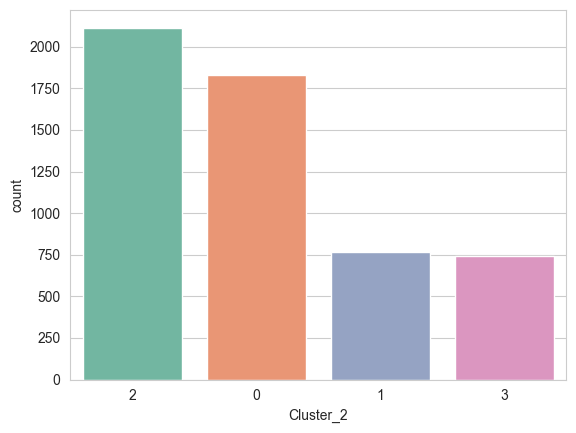

In [81]:
# Composición de los clusters formados
sns.countplot(x="Cluster_2",data=df_final_final, palette="Set2", order = df_final_final['Cluster_2'].value_counts().index)

In [82]:
# Composición de los clusters - Media de las variables por cluster
df_final_final.groupby(['Cluster_2']).mean()

churches   resorts   beaches     parks  theatres   museums  \
Cluster_2                                                               
0          1.151267  2.130093  1.946920  2.098170  2.386477  3.021944   
1          0.839308  1.046932  1.678695  1.537598  1.626410  1.624230   
2          1.671385  2.690080  3.275059  3.969239  4.162586  3.575825   
3          3.729274  2.708280  2.436062  2.092231  1.988320  1.712742   

              malls       zoo  restaurants  pubs/bars  ...      gyms  \
Cluster_2                                              ...             
0          4.232163  3.774959     4.426832   3.815855  ...  0.512632   
1          2.812037  2.046789     2.780574   2.798721  ...  1.348303   
2          3.096827  2.224255     2.444619   2.358946  ...  0.581078   
3          1.588333  1.215981     1.141062   1.304059  ...  2.134852   

           bakeries  beauty & spas     cafes  view points  monuments  \
Cluster_2                                                              
0          0.528394       0.677089  0.699634     1.106772   1.011070   
1          1.420809       0.937363  0.726332     0.830144   0.798042   
2          0.716544       0.857863  0.856085     2.223537   1.834506   
3          2.994530       2.998105  3.084449     3.335188   3.073414   

            gardens      PCA1      PCA2      PCA3  
Cluster_2                                          
0          1.123905 -1.872842  0.072400 -0.988876  
1          0.935470 -0.998621  2.981162  1.118702  
2          1.710359  0.458698 -1.591415  0.674295  
3          3.101909  4.333293  1.276489 -0.634983  

[4 rows x 27 columns]

In [83]:
df_final_final.describe()

churches      resorts      beaches        parks     theatres  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.660638     2.273942     2.490812     2.743972     2.913975   
std       1.335997     1.535946     1.324466     1.462095     1.420743   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
25%       0.920000     1.360000     1.540000     1.730000     1.770000   
50%       1.340000     1.905000     2.060000     2.460000     2.670000   
75%       1.810000     2.682500     2.740000     4.092500     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

           museums        malls          zoo  restaurants    pubs/bars  ...  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000  ...   
mean      2.861893     3.232152     2.582254     2.979247     2.765770  ...   
std       1.383069     1.569752     1.321315     1.551344     1.401146  ...   
min       1.110000     1.120000     0.860000     0.840000     0.810000  ...   
25%       1.790000     1.120000     1.620000     1.800000     1.640000  ...   
50%       2.680000     3.230000     2.170000     2.800000     2.680000  ...   
75%       3.840000     5.000000     3.190000     5.000000     3.530000  ...   
max       5.000000     5.000000     5.000000     5.000000     5.000000  ...   

          bakeries  beauty & spas        cafes  view points    monuments  \
count  5456.000000    5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.062912       1.100209     1.089232     1.804720     1.581593   
std       1.403090       1.407680     1.247339     1.688095     1.419483   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.520000       0.540000     0.570000     0.740000     0.790000   
50%       0.690000       0.690000     0.760000     1.030000     1.070000   
75%       0.860000       0.860000     1.000000     2.070000     1.560000   
max       5.000000       5.000000     5.000000     5.000000     5.000000   

           gardens         PCA1          PCA2          PCA3    Cluster_2  
count  5456.000000  5456.000000  5.456000e+03  5.456000e+03  5456.000000  
mean      1.594514     0.000000  3.125555e-17 -5.209258e-18     1.324780  
std       1.248827     2.282300  1.872521e+00  1.344274e+00     1.078622  
min       0.000000    -3.639987 -3.942433e+00 -3.222494e+00     0.000000  
25%       0.880000    -1.763333 -1.312781e+00 -1.012606e+00     0.000000  
50%       1.290000    -0.589889 -2.444071e-01  2.468157e-01     2.000000  
75%       1.660000     1.228487  1.169545e+00  9.851358e-01     2.000000  
max       5.000000     8.236357  5.796348e+00  4.148180e+00     3.000000  

[8 rows x 28 columns]

In [84]:
pal=['autumn','cool','magma','spring','winter']

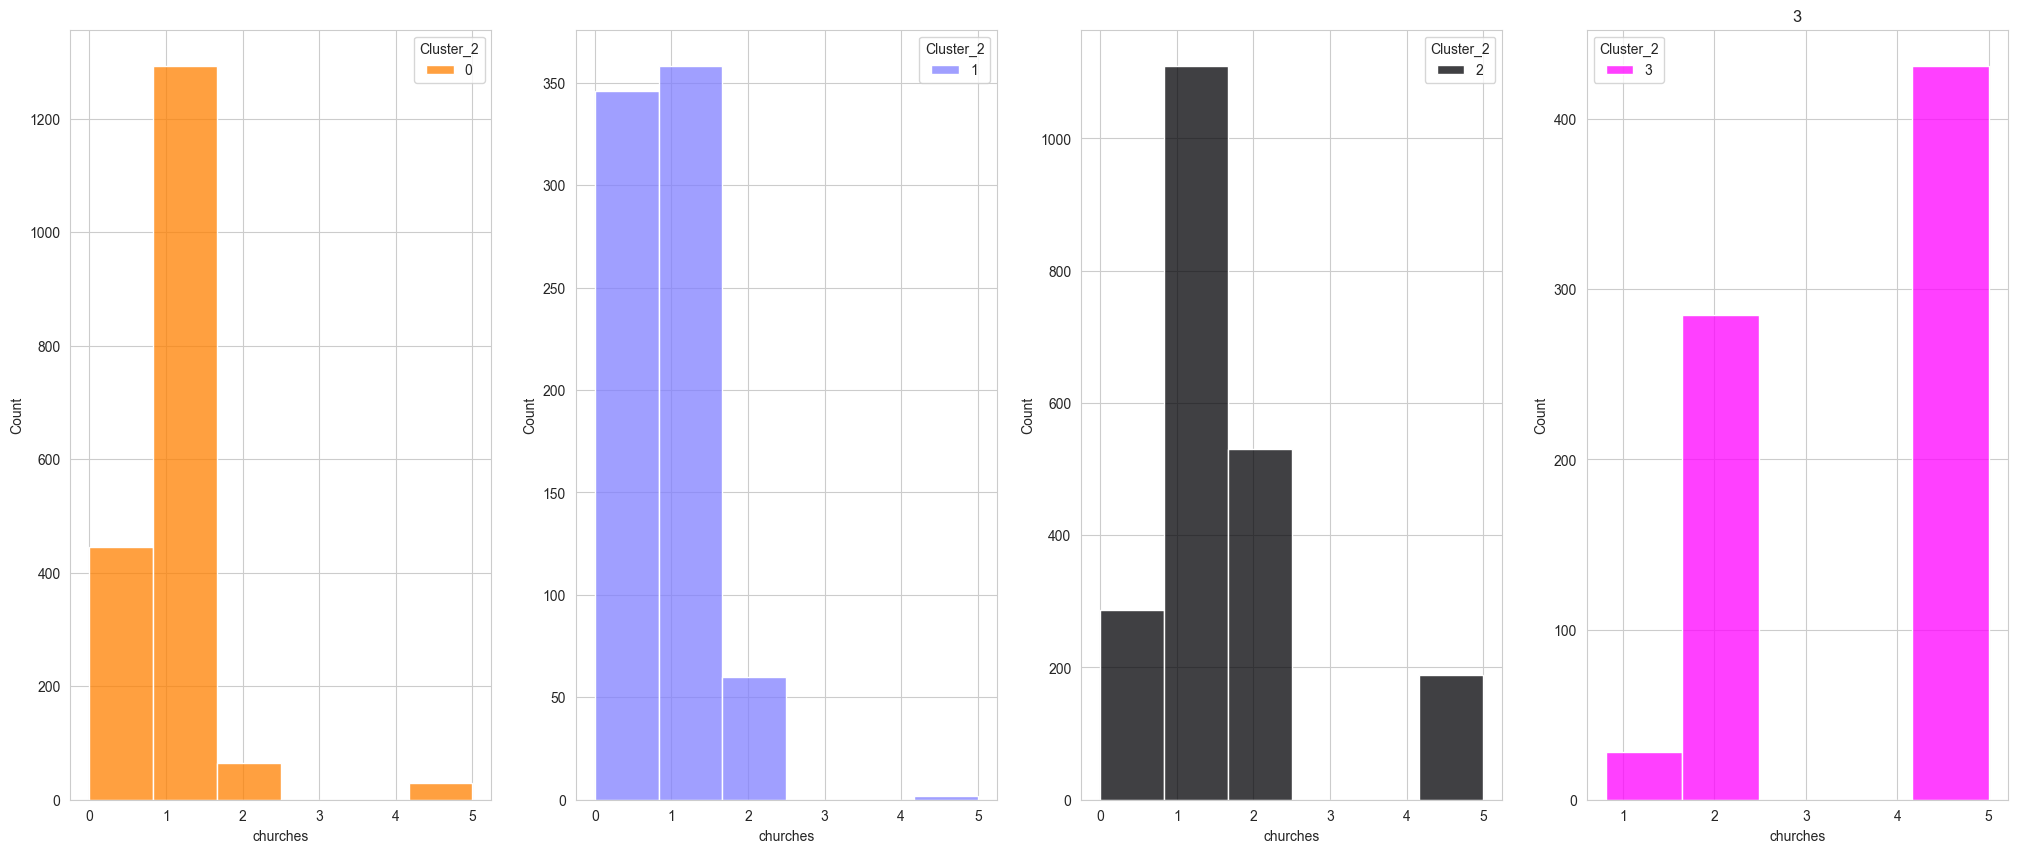

In [85]:
churches = df_final_final[['Cluster_2','churches']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=churches[churches.Cluster_2==i],x='churches',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

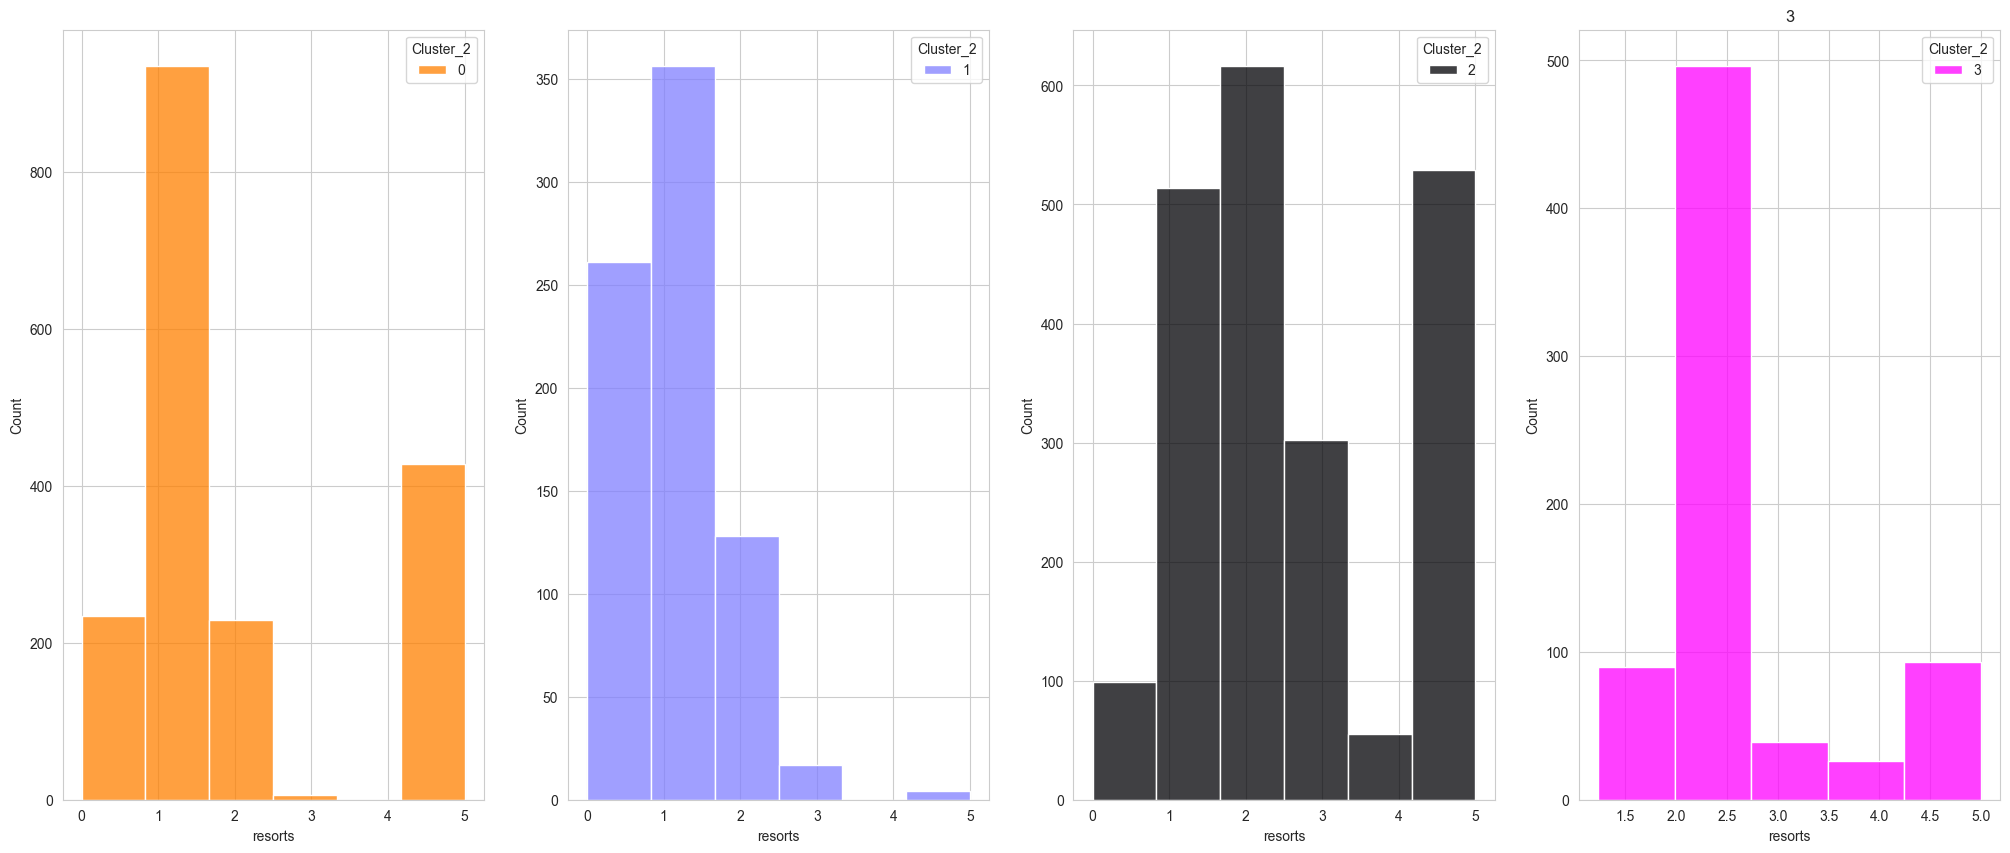

In [86]:
resorts = df_final_final[['Cluster_2','resorts']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=resorts[resorts.Cluster_2==i],x='resorts',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

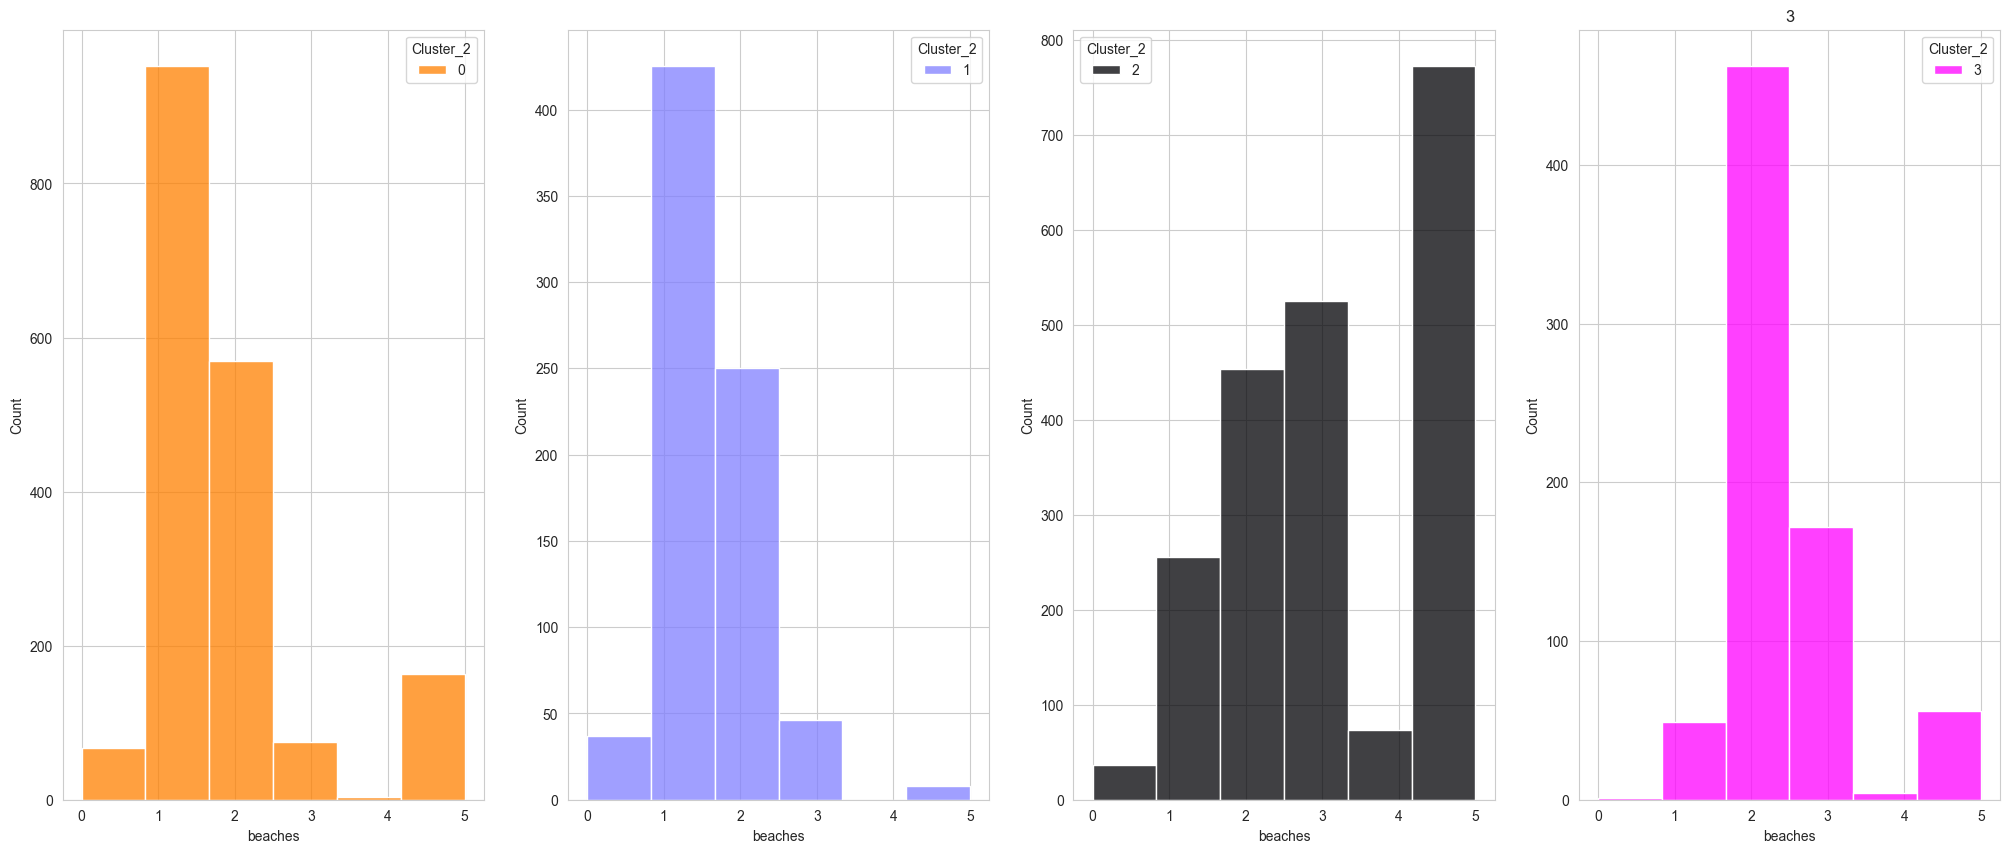

In [87]:
beaches = df_final_final[['Cluster_2','beaches']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=beaches[beaches.Cluster_2==i],x='beaches',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

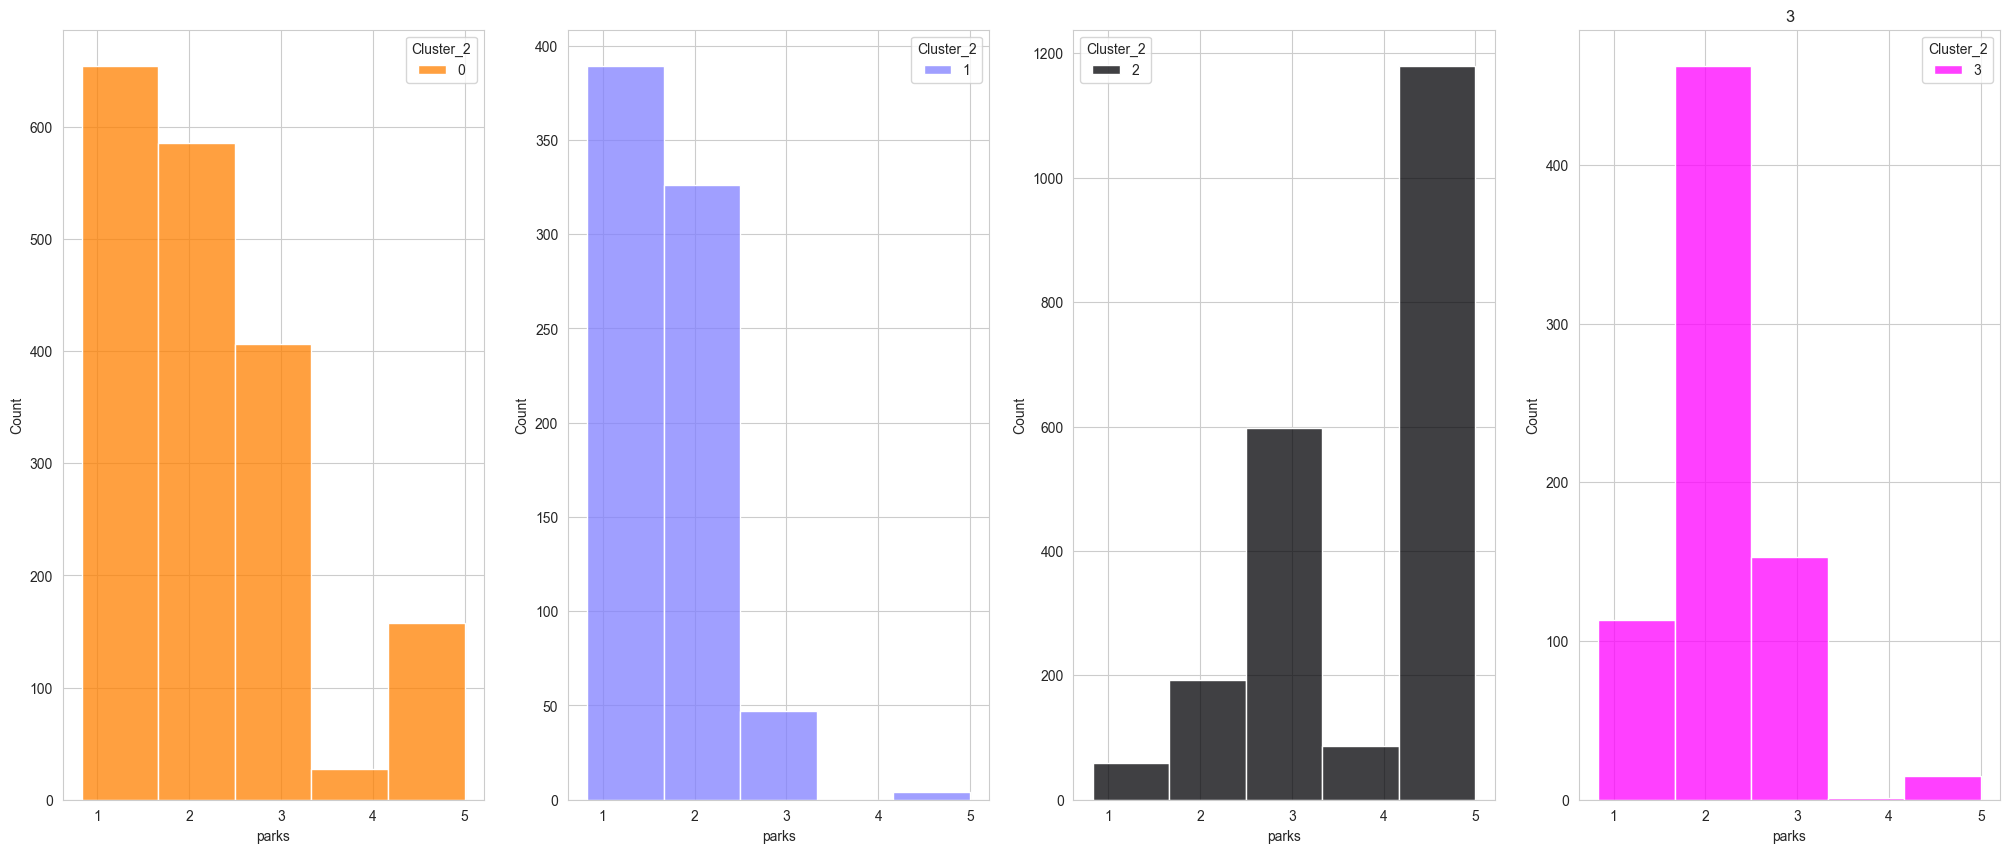

In [88]:
parks = df_final_final[['Cluster_2','parks']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=parks[parks.Cluster_2==i],x='parks',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

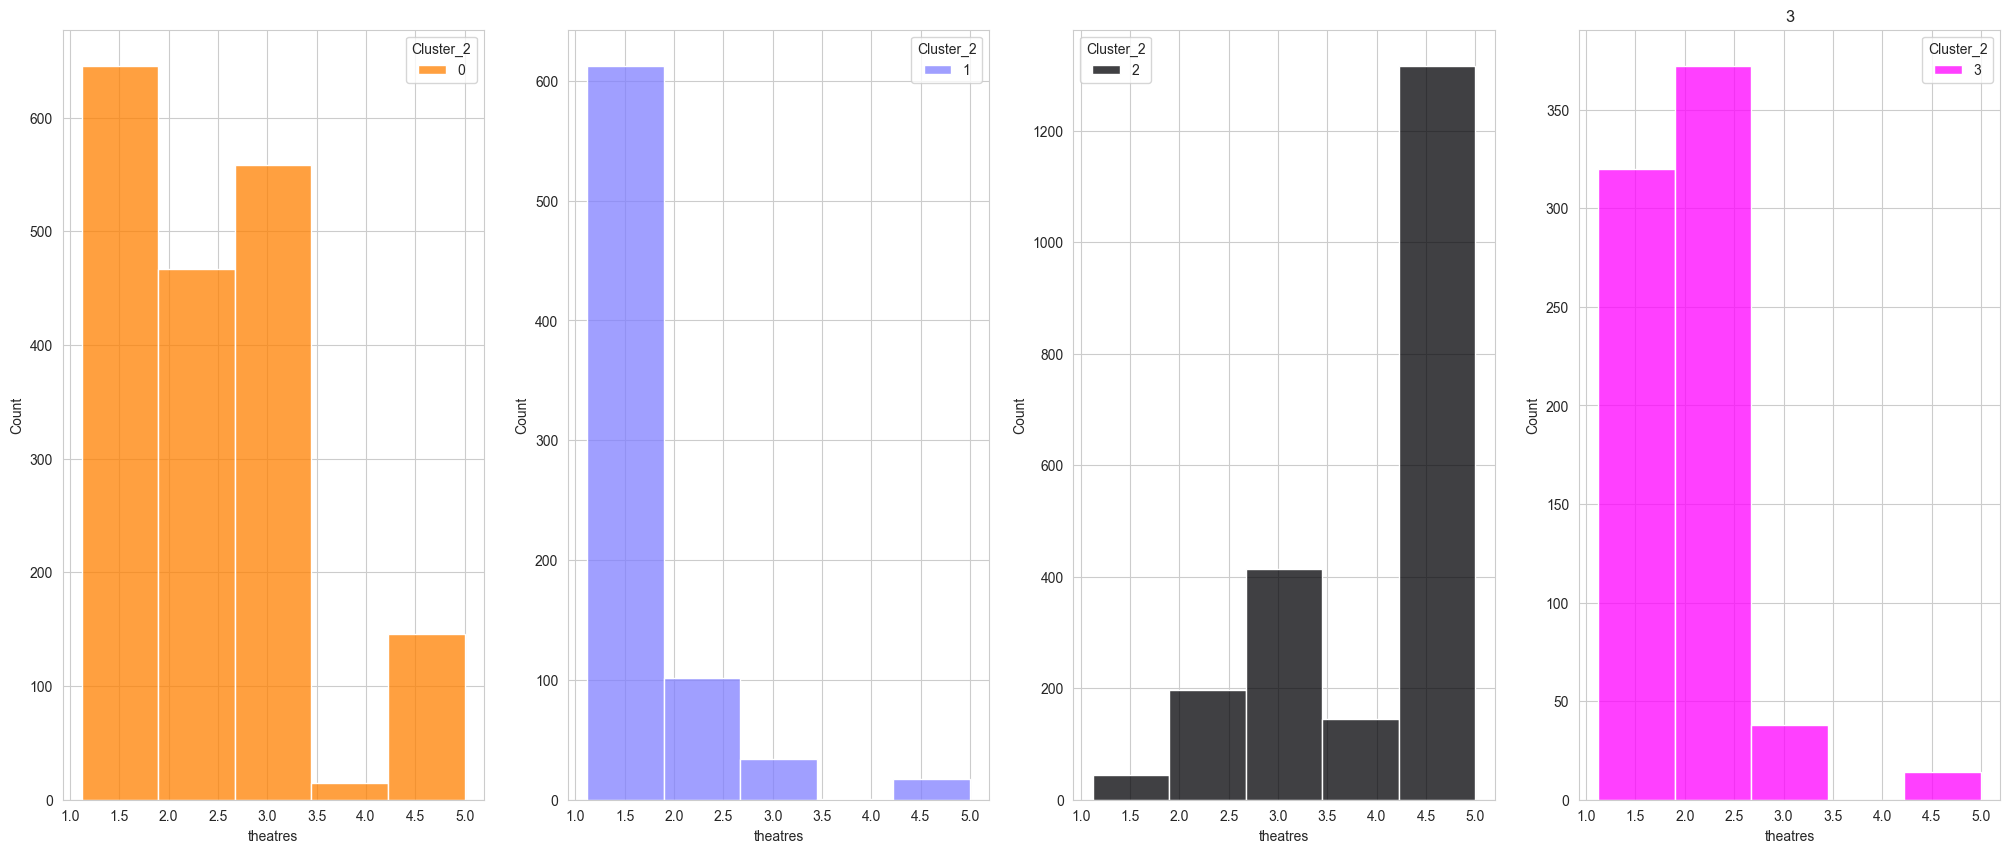

In [89]:
theatres = df_final_final[['Cluster_2','theatres']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=theatres[theatres.Cluster_2==i],x='theatres',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

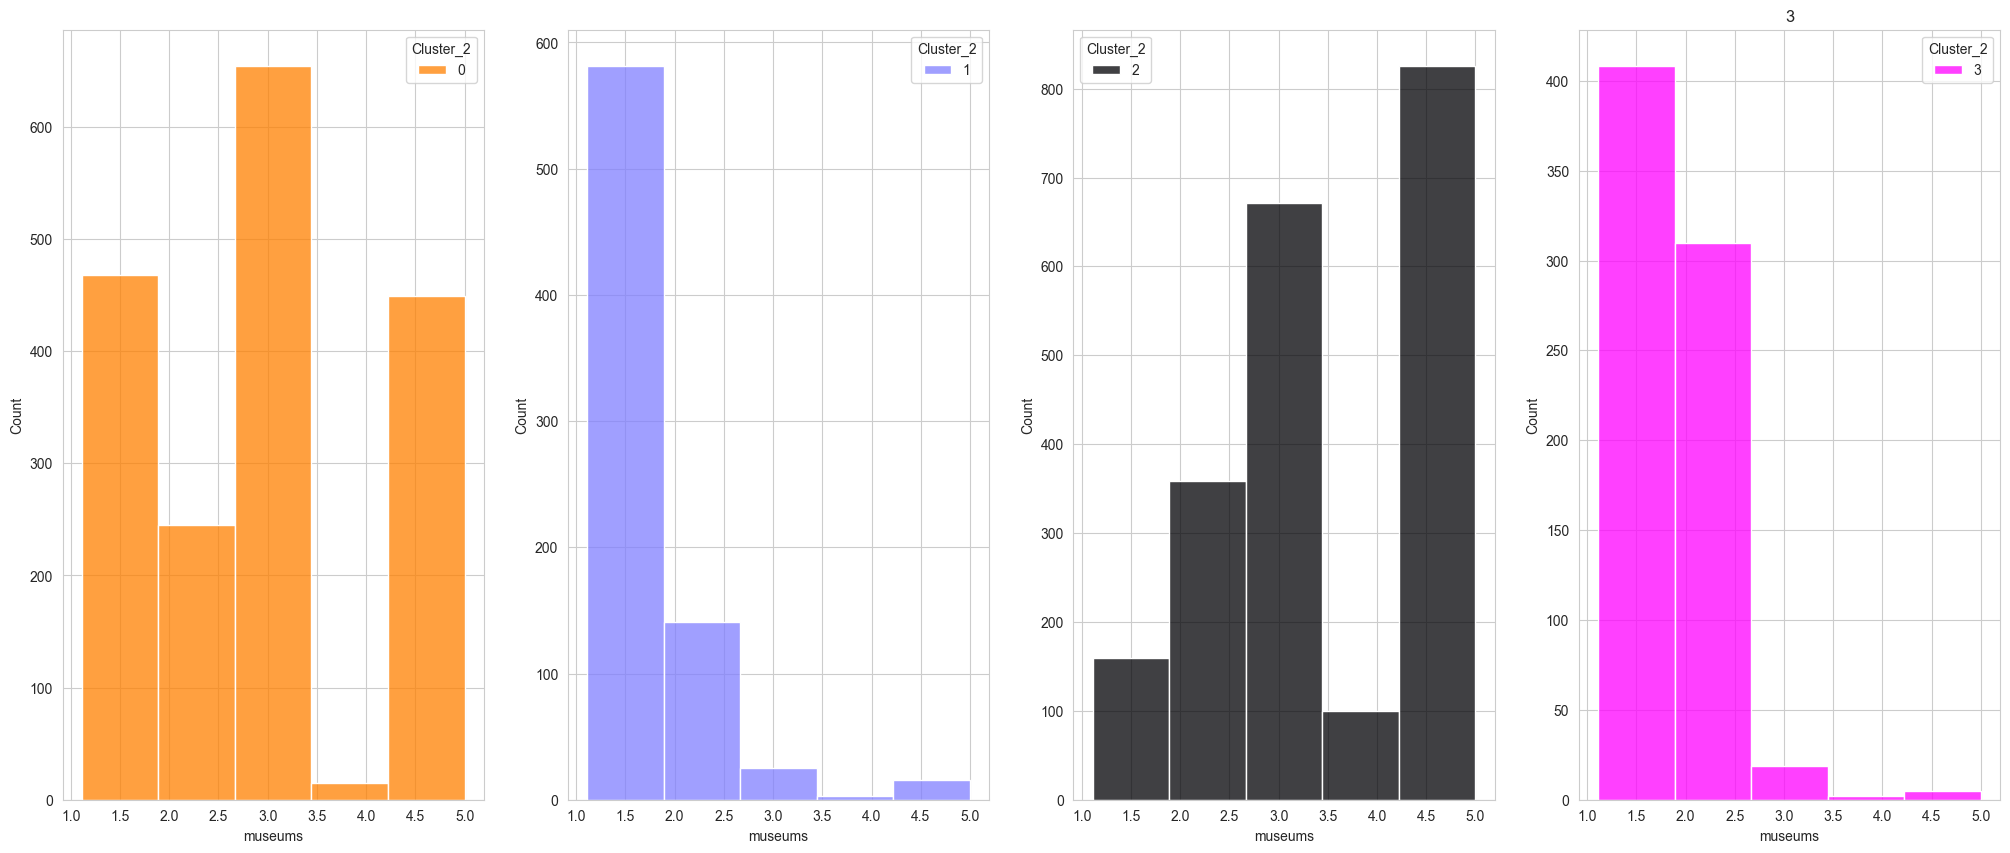

In [90]:
museums = df_final_final[['Cluster_2','museums']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=museums[museums.Cluster_2==i],x='museums',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

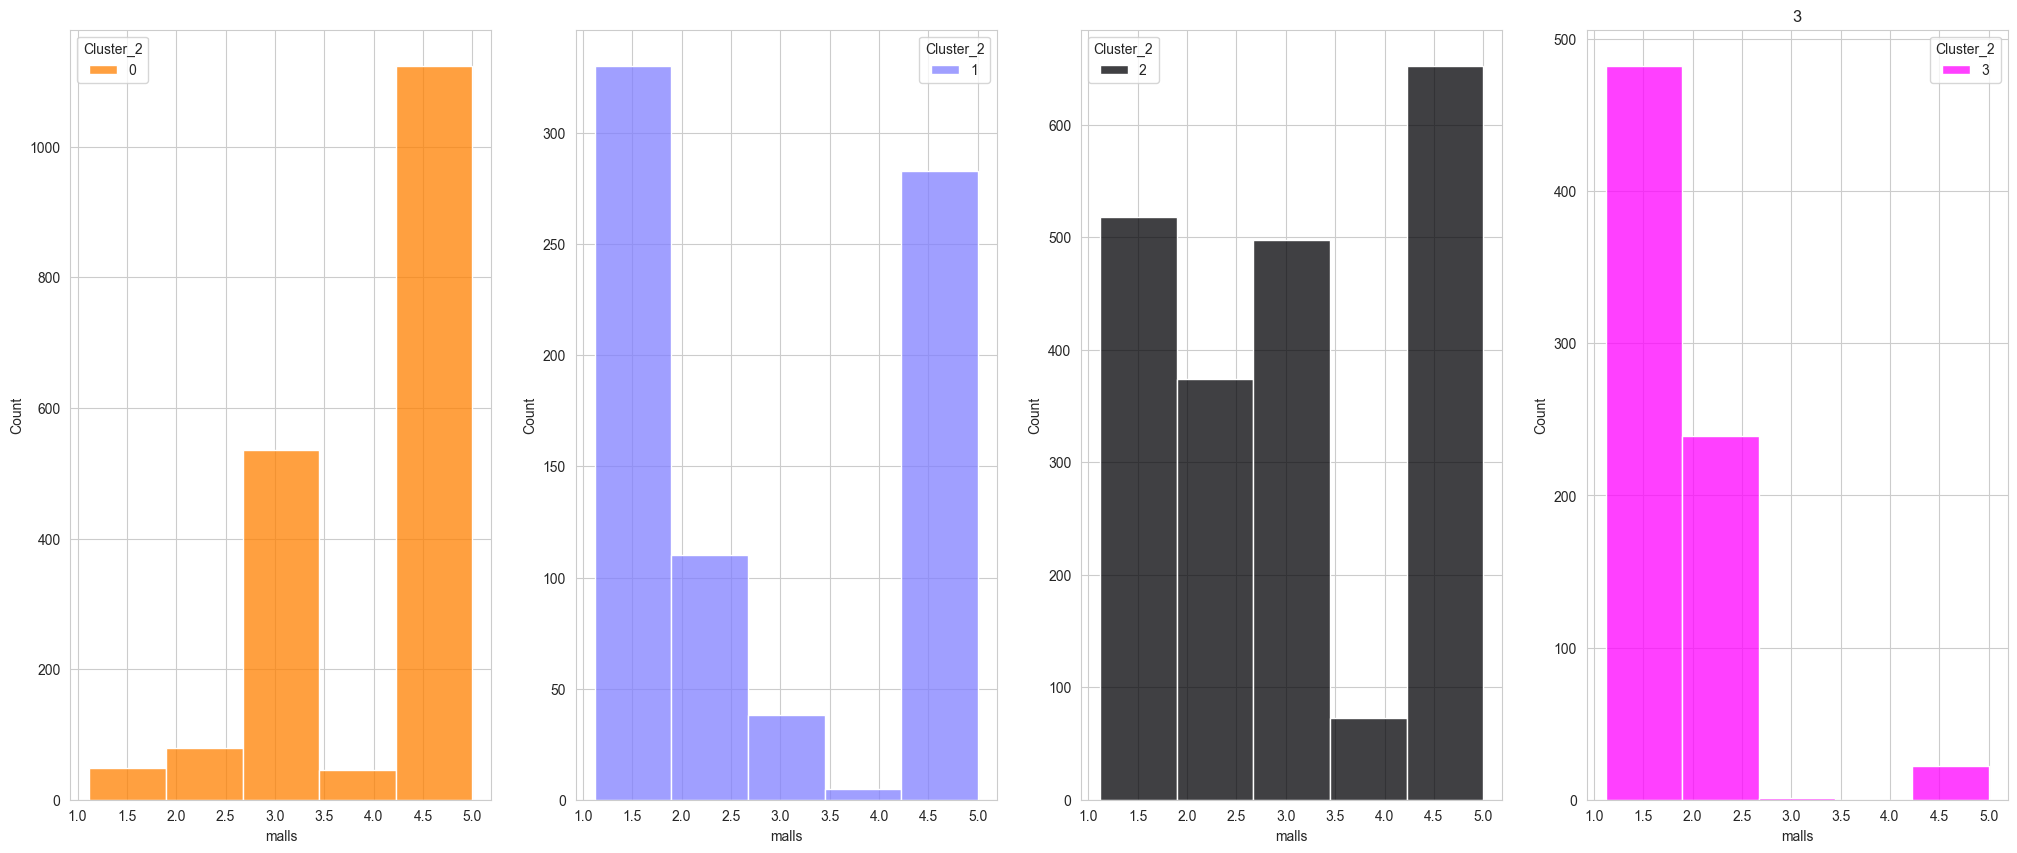

In [91]:
malls = df_final_final[['Cluster_2','malls']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=malls[malls.Cluster_2==i],x='malls',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

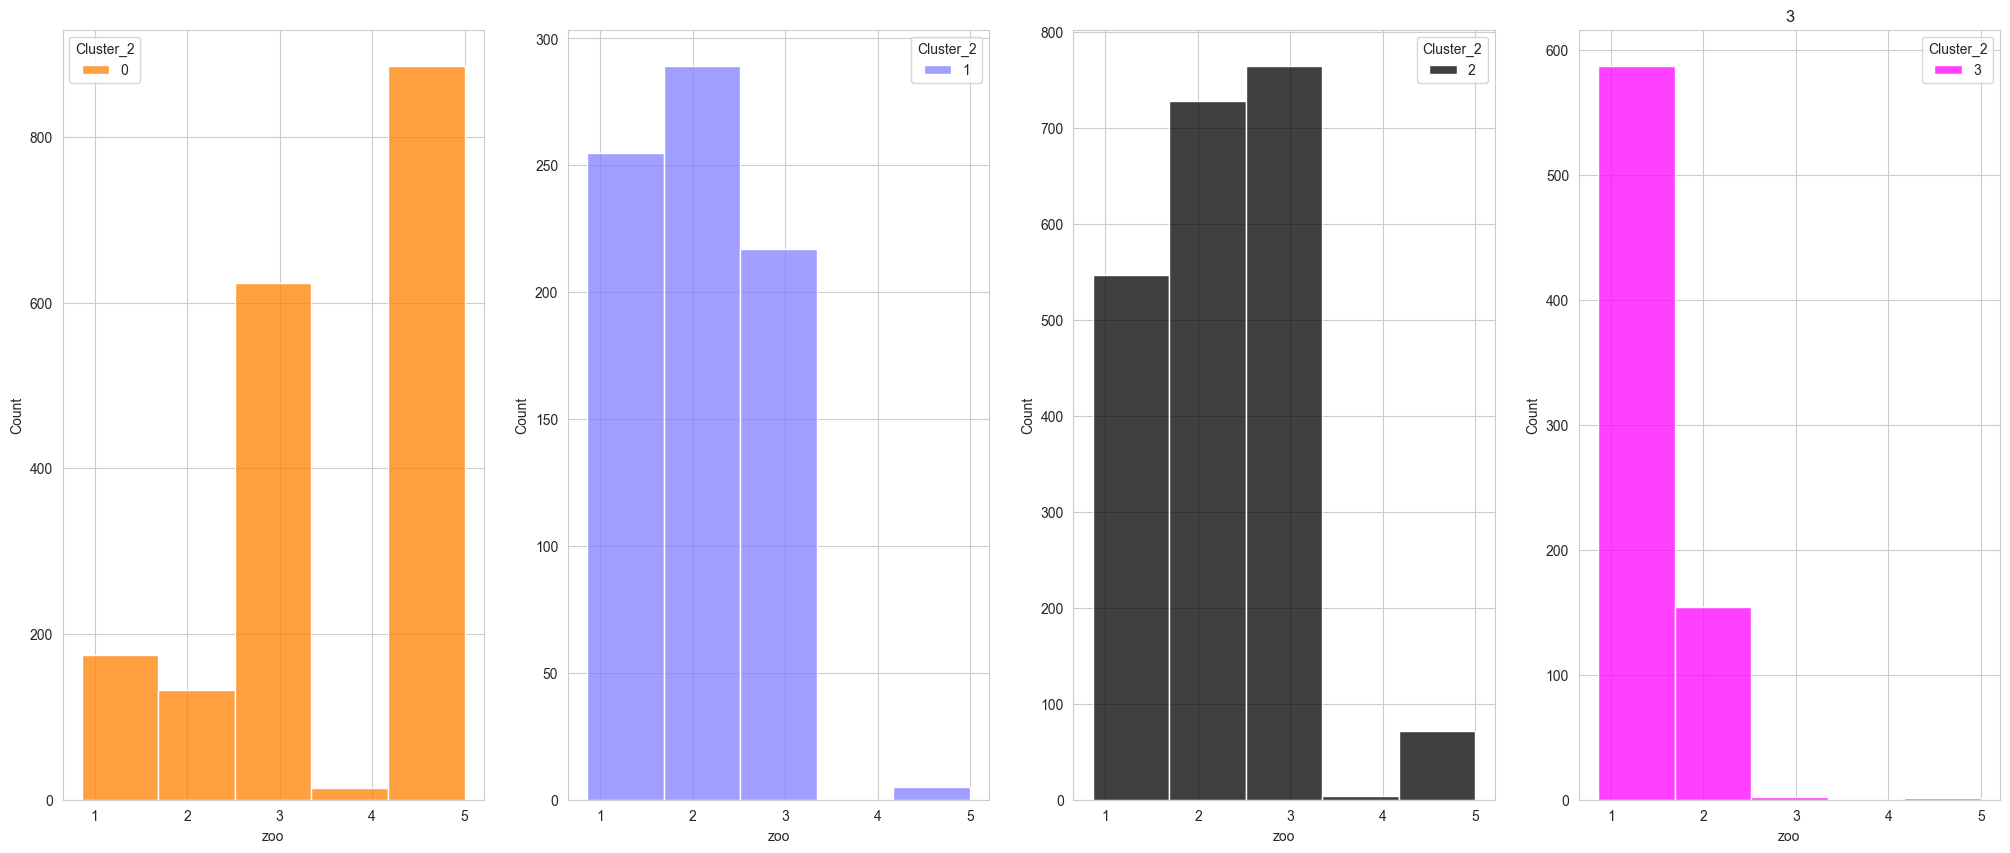

In [92]:
zoo = df_final_final[['Cluster_2','zoo']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=zoo[zoo.Cluster_2==i],x='zoo',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

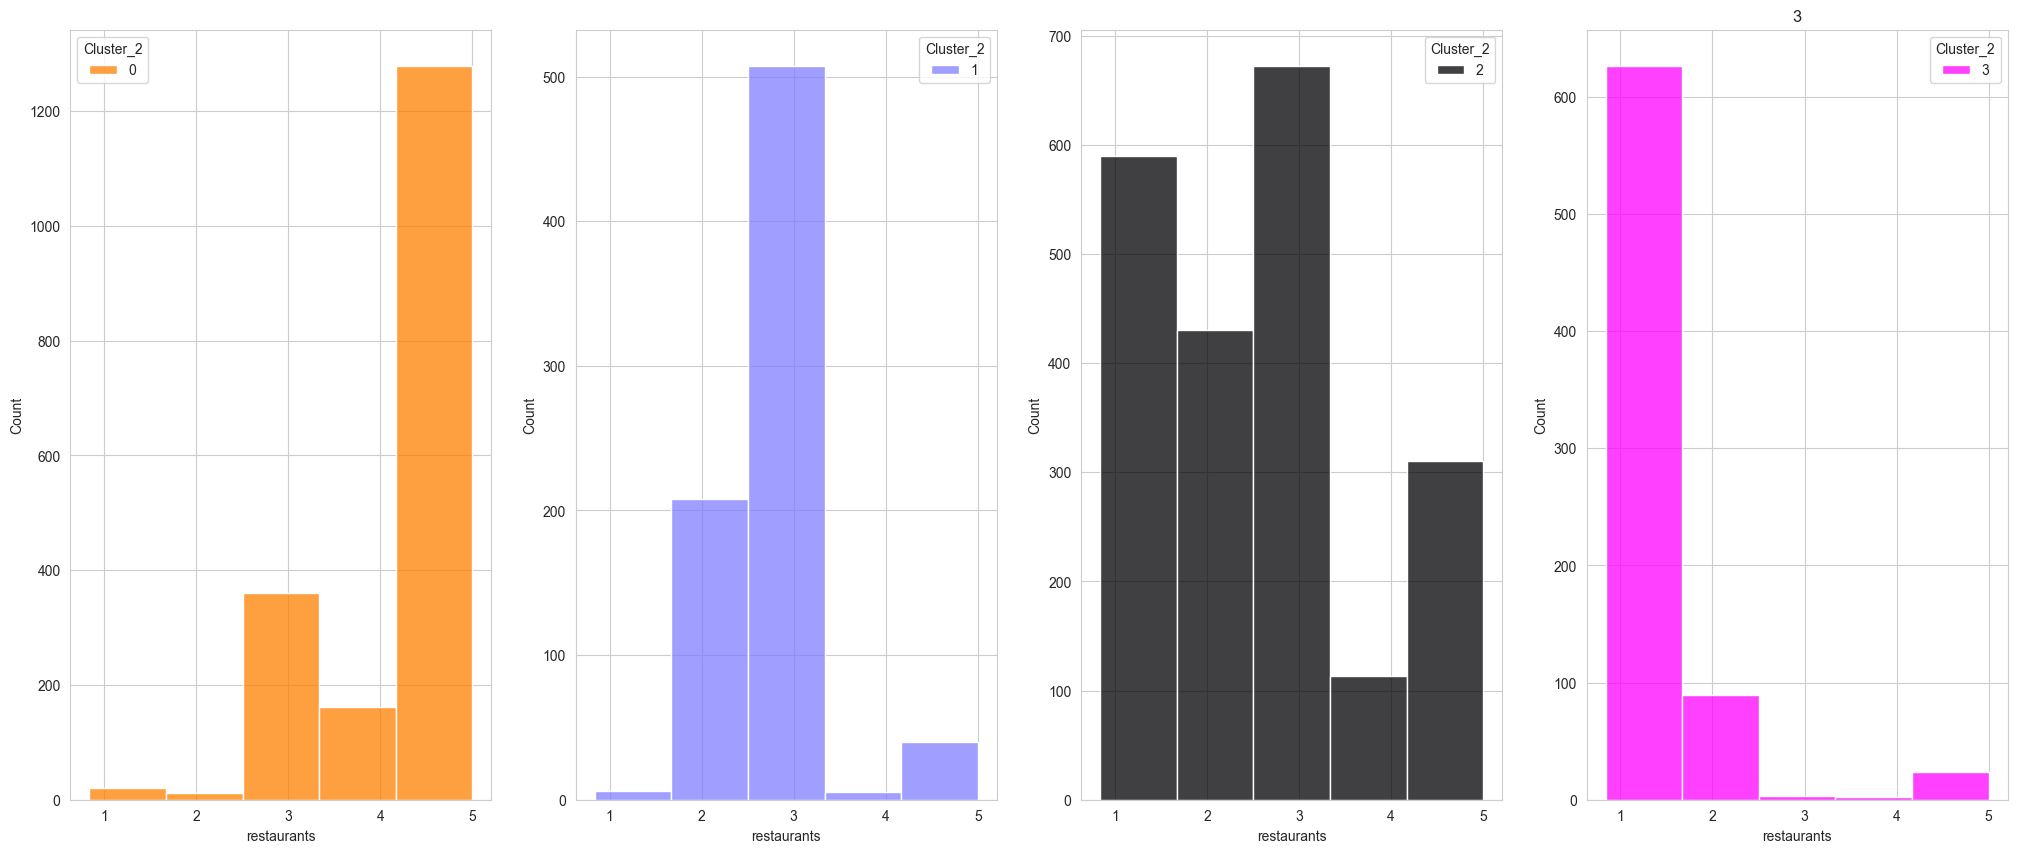

In [93]:
restaurants = df_final_final[['Cluster_2','restaurants']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=restaurants[restaurants.Cluster_2==i],x='restaurants',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

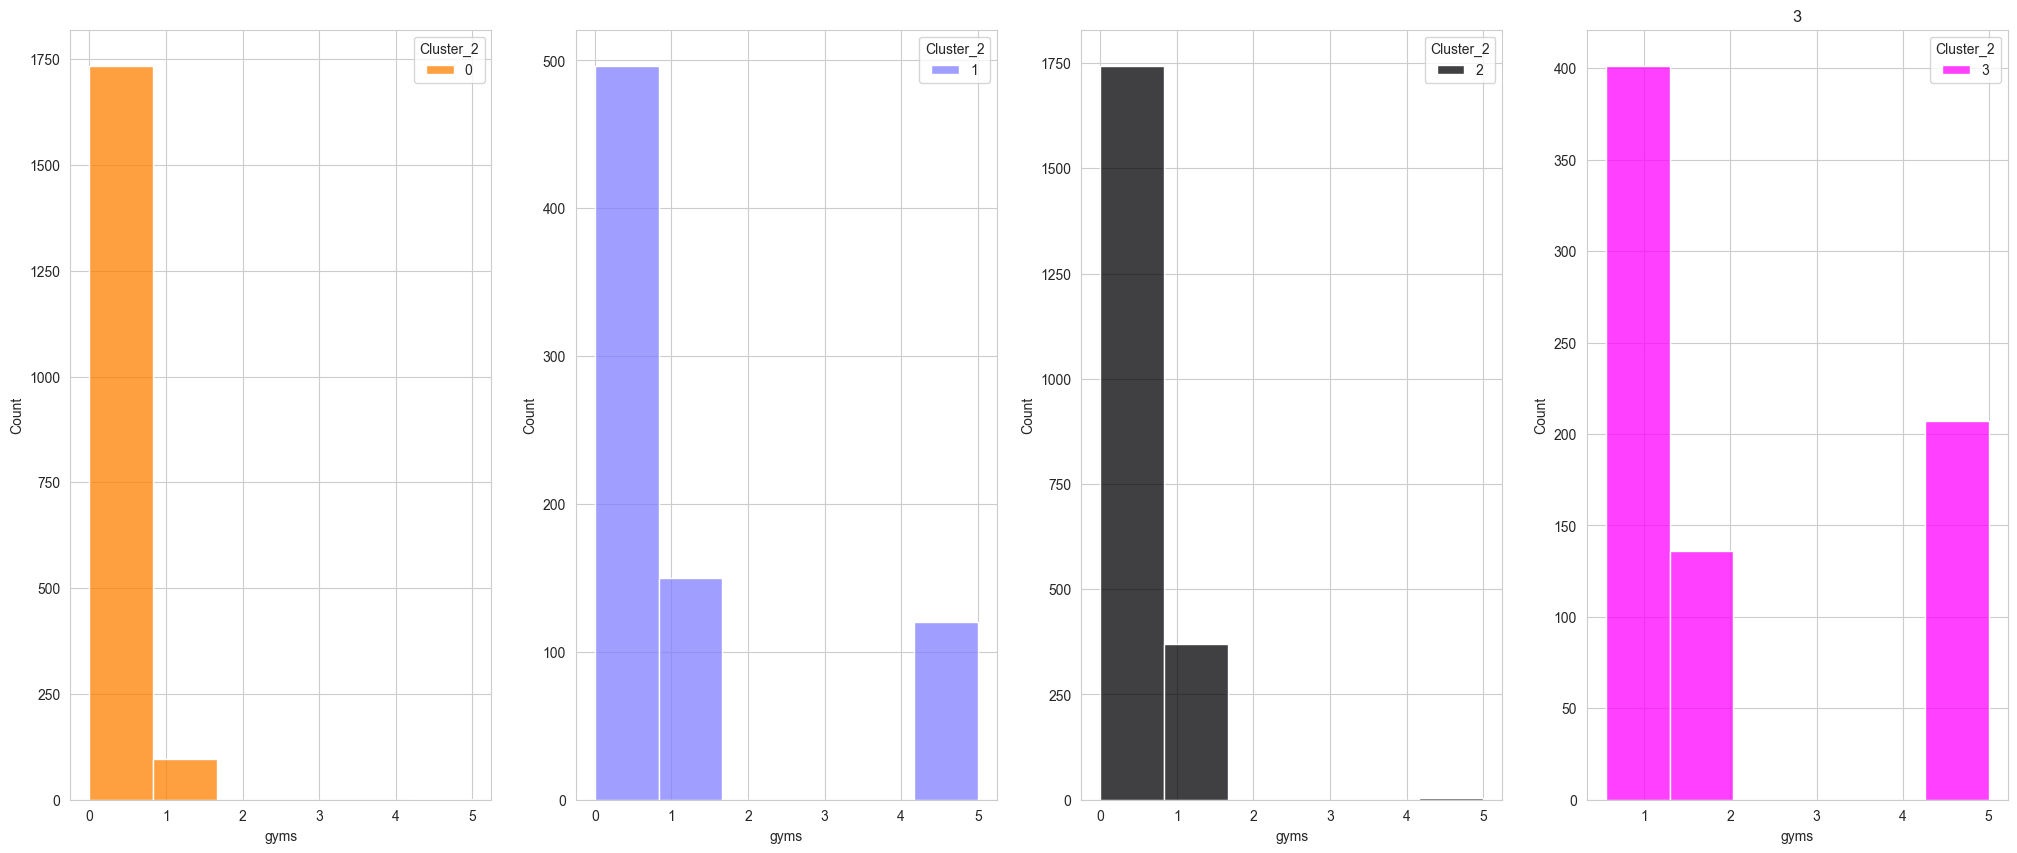

In [94]:
gyms = df_final_final[['Cluster_2','gyms']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=gyms[gyms.Cluster_2==i],x='gyms',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

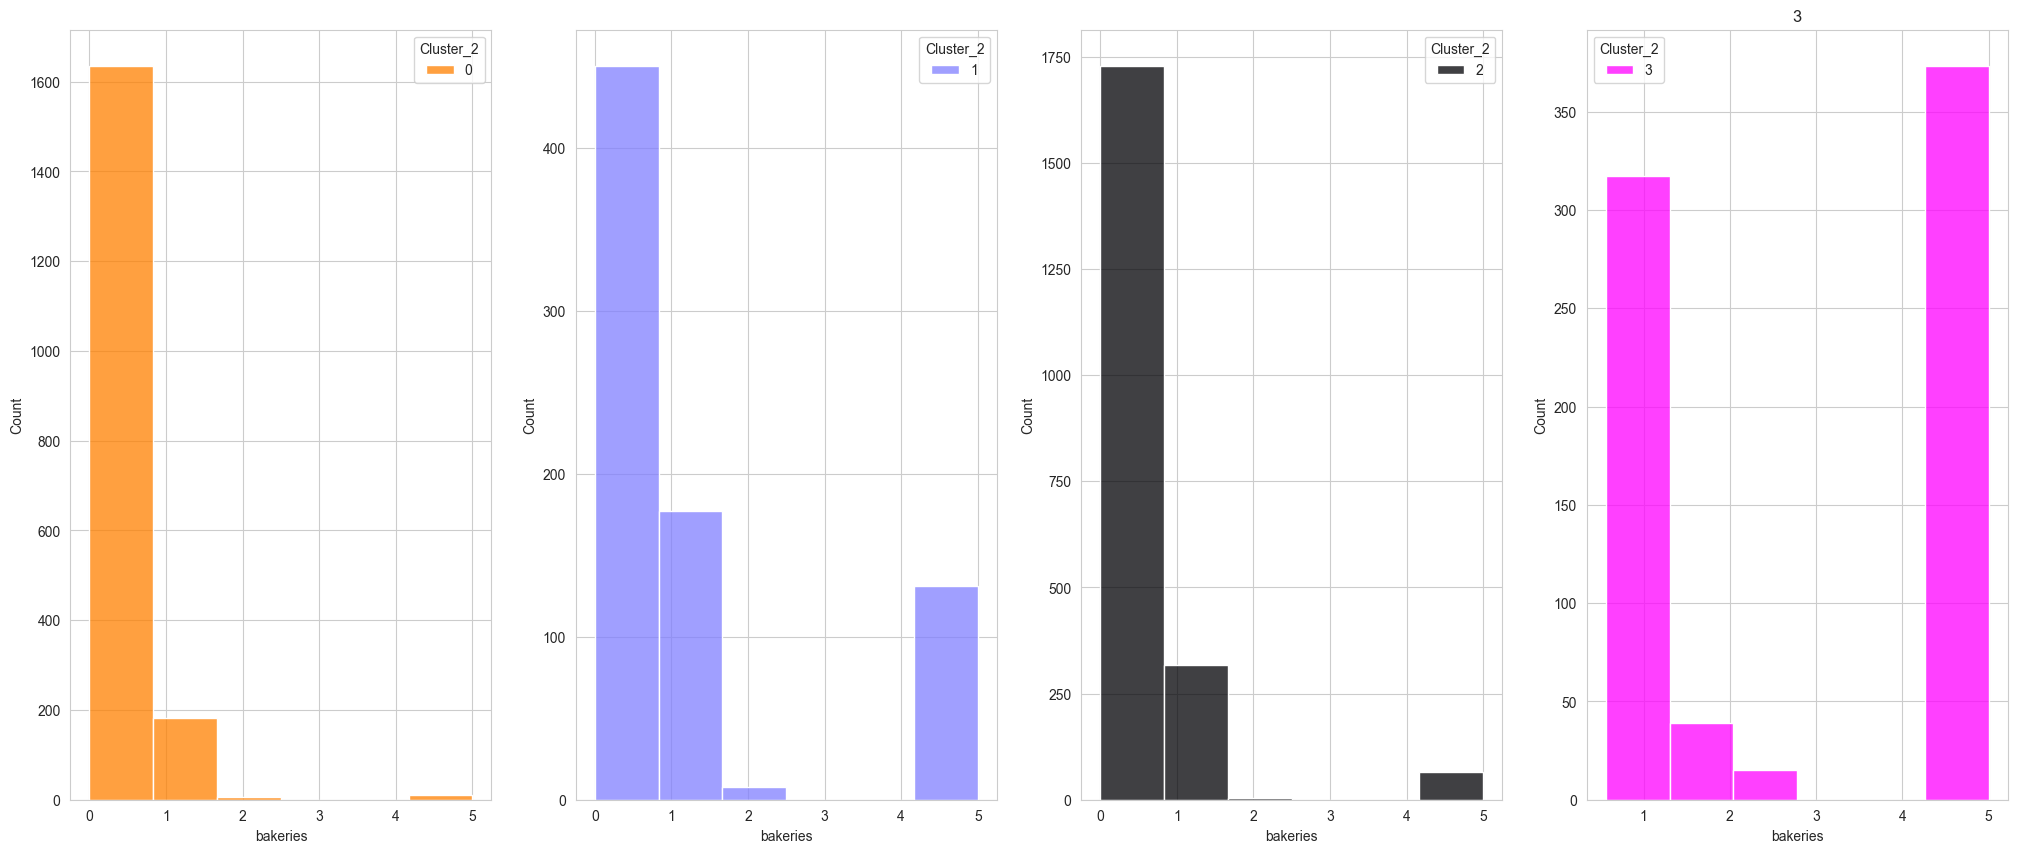

In [95]:
bakeries = df_final_final[['Cluster_2','bakeries']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=bakeries[bakeries.Cluster_2==i],x='bakeries',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

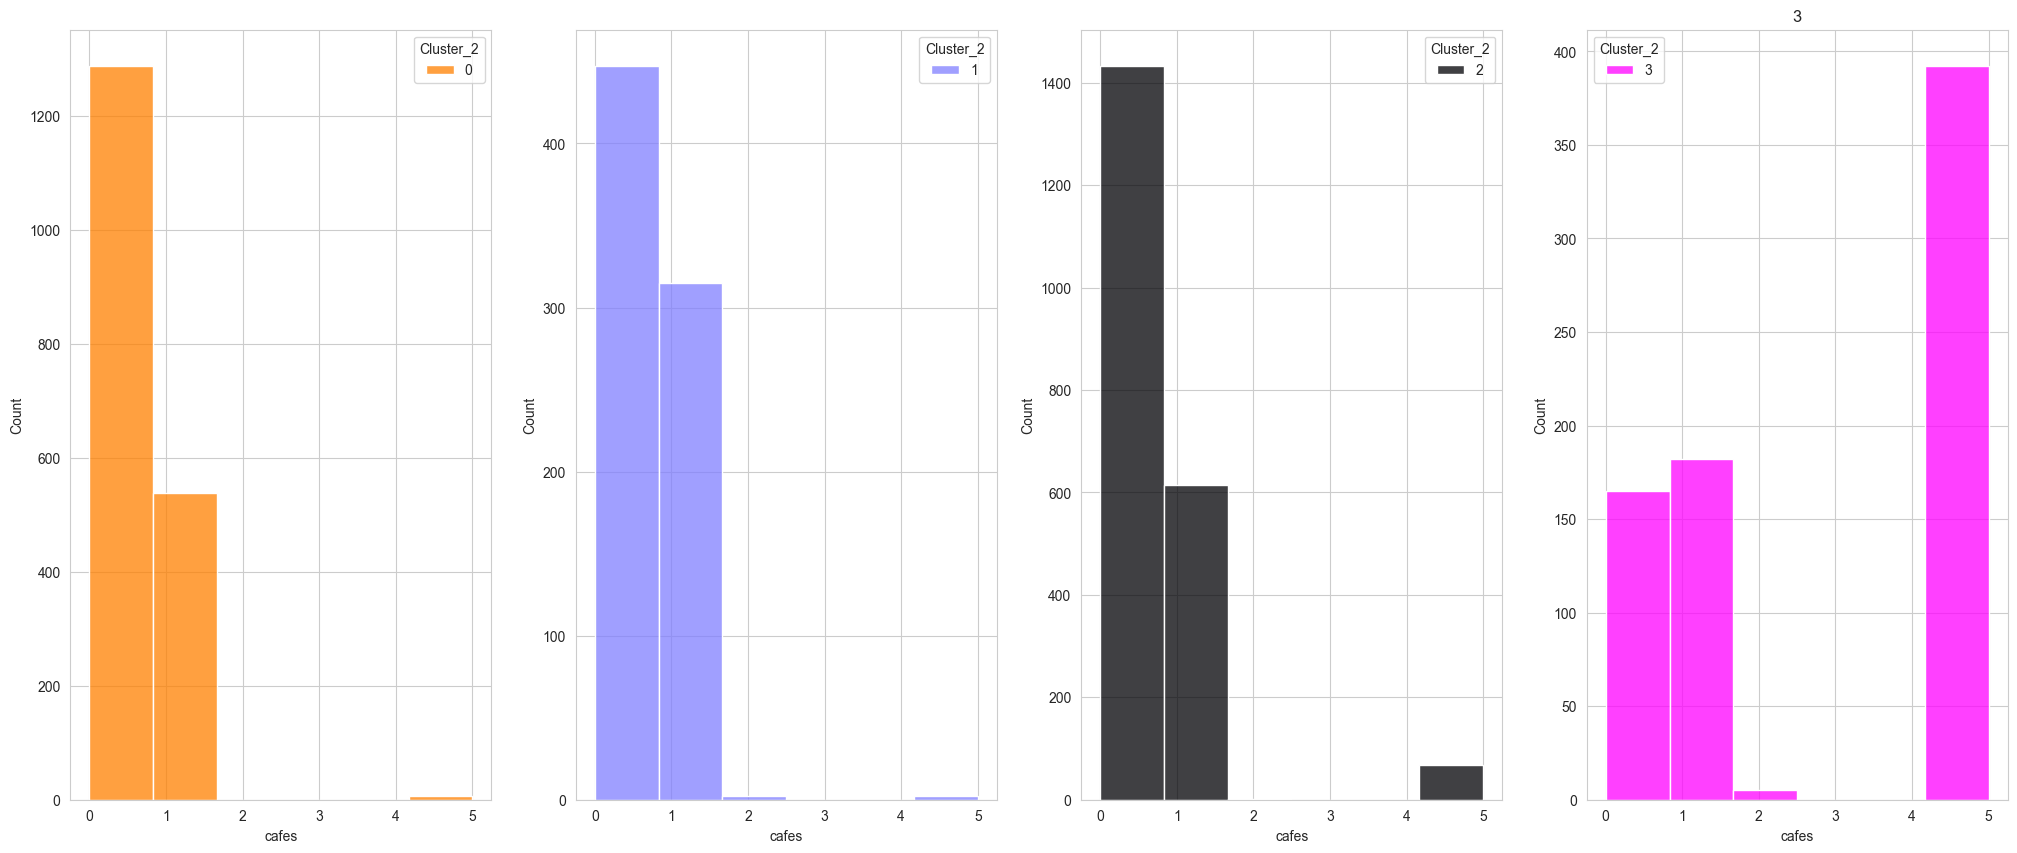

In [96]:
cafes = df_final_final[['Cluster_2','cafes']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=cafes[cafes.Cluster_2==i],x='cafes',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

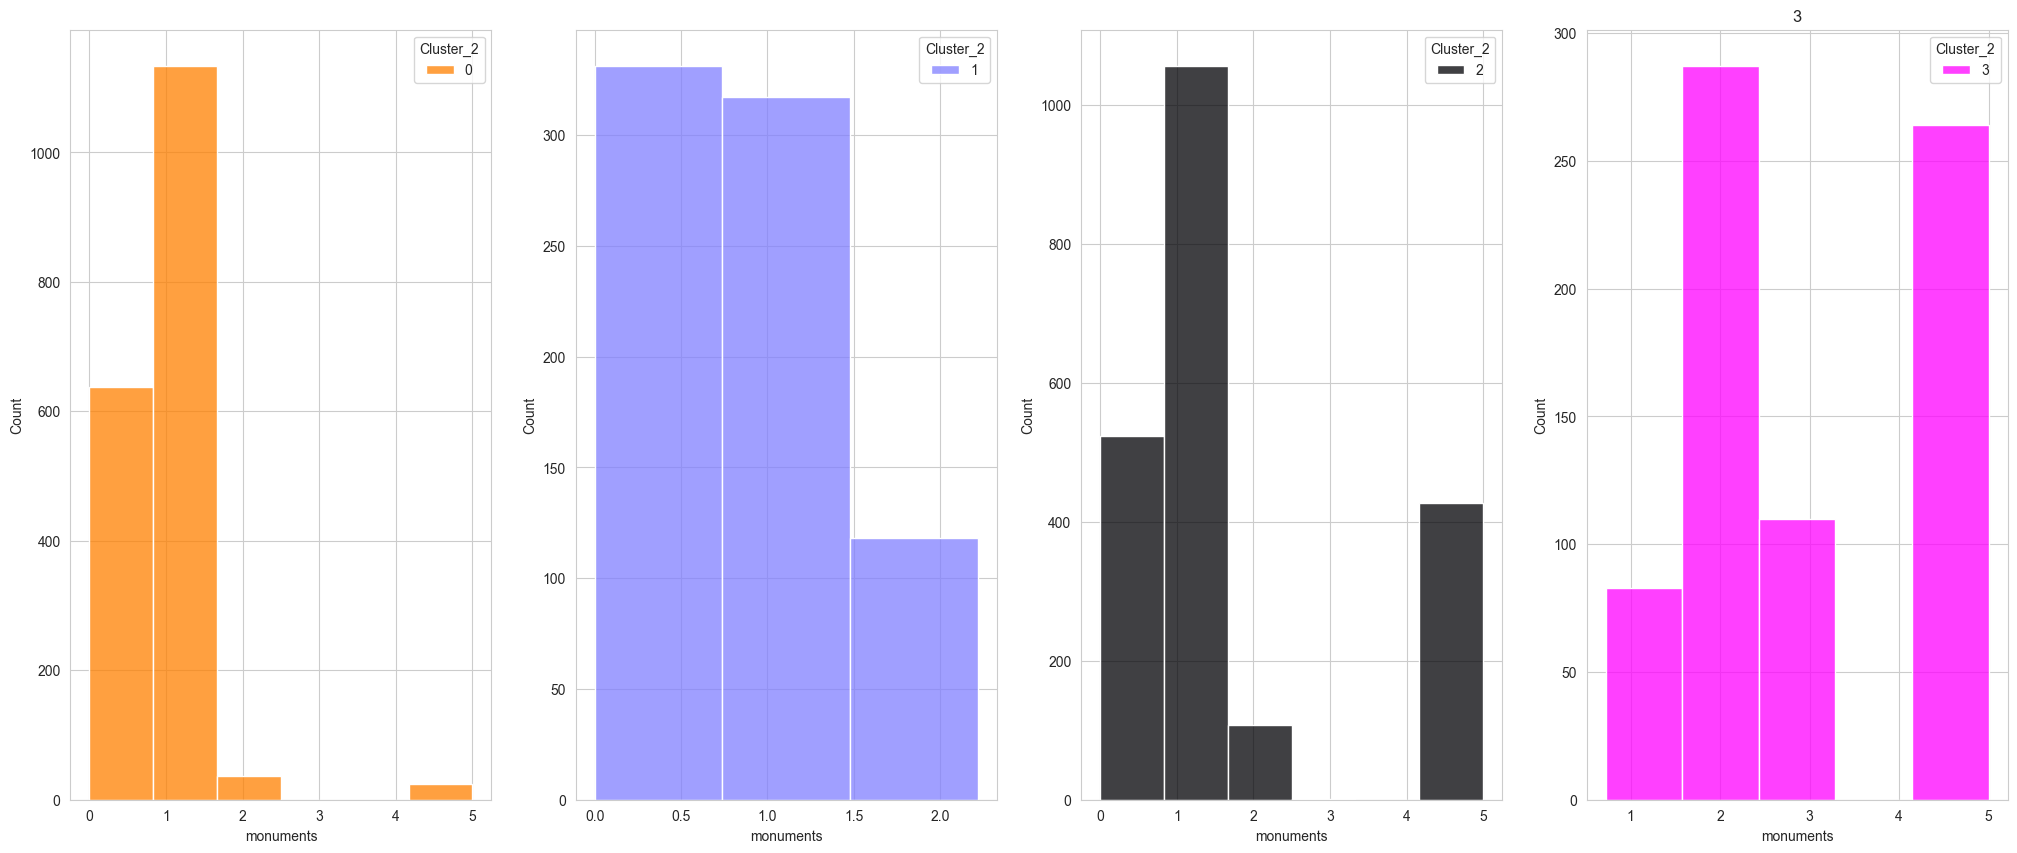

In [97]:
monuments = df_final_final[['Cluster_2','monuments']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=monuments[monuments.Cluster_2==i],x='monuments',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

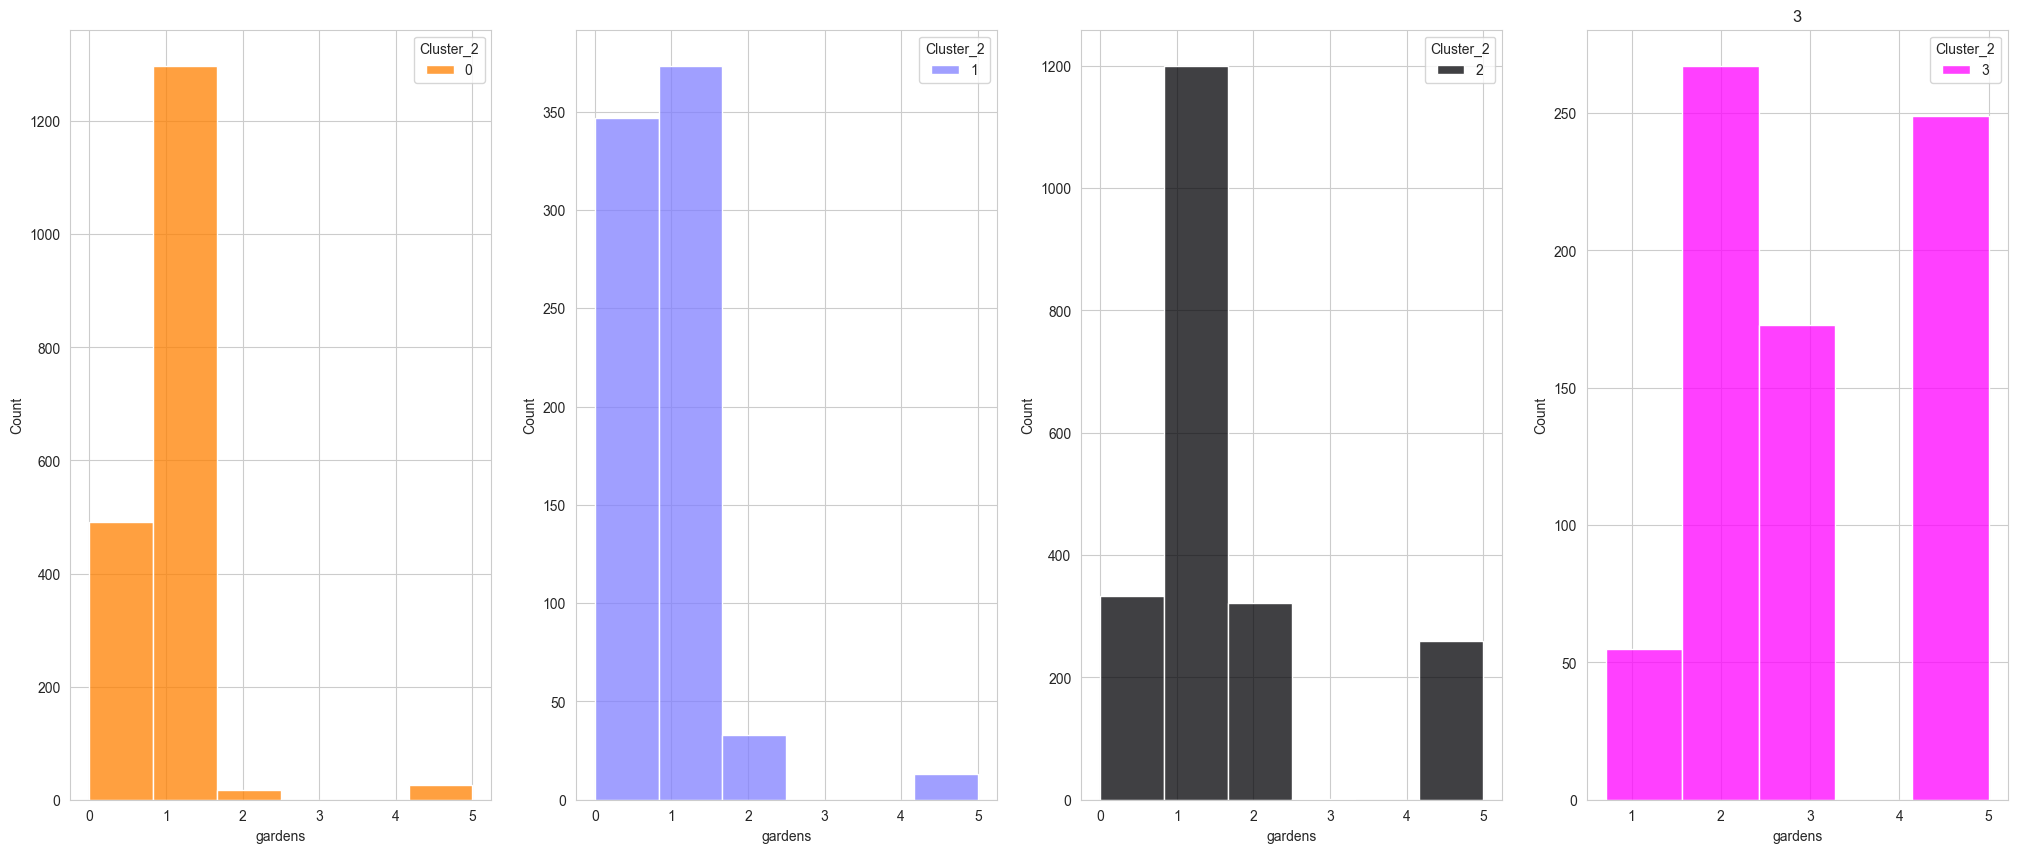

In [98]:
gardens = df_final_final[['Cluster_2','gardens']]
fig,axs=plt.subplots(ncols=4,figsize =(25, 10))

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=gardens[gardens.Cluster_2==i],x='gardens',hue='Cluster_2',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')

### Análisis de factores

In [99]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Selección de variables de encuestas
df_fa = df2[df2.columns[6:20]] 

# Aplicación de la prueba bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df_fa)
chi_square_value, p_value

(20459.56751183832, 0.0)

In [100]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Aplicación de la prueba KMO
kmo_all,kmo_model=calculate_kmo(df_fa)
kmo_model

0.7691507683104338

In [101]:
# Crear un objeto de análisis factorial y realizar un análisis factorial
fa = FactorAnalyzer(23, rotation=None)
fa.fit(df_fa)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.59847536, 2.17719925, 1.35750575, 1.25758725, 0.97607656,
       0.83551573, 0.64682595, 0.5889711 , 0.52243964, 0.48362926,
       0.42987682, 0.42541611, 0.37713562, 0.3233456 ])

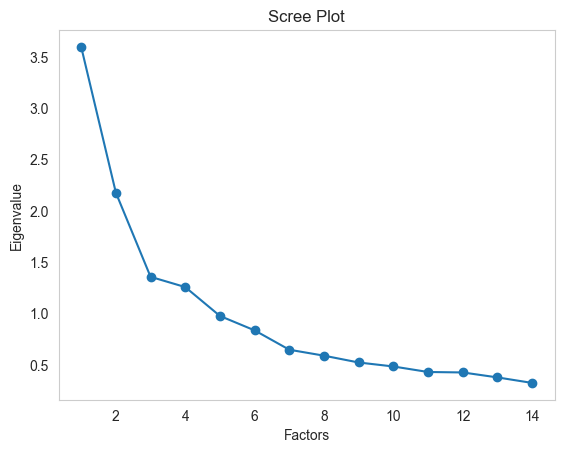

In [102]:
# Diagrama con valores propios
plt.scatter(range(1,df_fa.shape[1]+1),ev)
plt.plot(range(1,df_fa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [103]:
# Analisis factorial
fa = FactorAnalyzer(4, rotation='varimax')
fa.fit(df_fa)

# Cargas
loads = fa.loadings_

# Cargas por cada variable y factor
print(pd.DataFrame(fa.loadings_,index=df_fa.columns))

                              0         1         2         3
malls                  0.504890 -0.259002  0.108034 -0.042785
zoo                    0.700010 -0.160877 -0.050430  0.181265
restaurants            0.786689 -0.175512  0.103356  0.060911
pubs/bars              0.654399 -0.111860 -0.018471  0.409736
local services         0.270389 -0.008128  0.065120  0.679821
burger/pizza shops    -0.049557 -0.011225  0.437325  0.425333
hotels/other lodgings -0.075492 -0.022706  0.645653  0.368027
juice bars             0.028744  0.025729  0.771793  0.021652
art galleries          0.124831  0.075701  0.430083 -0.136753
dance clubs           -0.033351  0.380181 -0.066711  0.008243
swimming pools        -0.145303  0.646003  0.055712  0.018656
gyms                  -0.218890  0.713458  0.118709 -0.096167
bakeries              -0.307500  0.465452  0.155636 -0.218073
beauty & spas         -0.222133  0.318014  0.038863 -0.346109


In [104]:
# Varianza explicada por cada factor
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3
Variance          2.103757  1.532039  1.465615  1.180972
Proportional Var  0.150268  0.109431  0.104687  0.084355
Cumulative Var    0.150268  0.259700  0.364386  0.448742


In [105]:
# Análisis de comunalidad
print(pd.DataFrame(fa.get_communalities(),index=df_fa.columns,columns=['Communalities']))

                       Communalities
malls                       0.335498
zoo                         0.551296
restaurants                 0.664076
pubs/bars                   0.608975
local services              0.539574
burger/pizza shops          0.374744
hotels/other lodgings       0.558527
juice bars                  0.597621
art galleries               0.224987
dance clubs                 0.150168
swimming pools              0.441885
gyms                        0.580275
bakeries                    0.382980
beauty & spas               0.271778


In [106]:
# Transformación del dataset
X_fa = fa.fit_transform(df_fa)
X_fa.shape

(5456, 4)

In [107]:
X_fa

array([[-0.16762187, -0.85893246, -0.312521  , -0.28467426],
       [-0.1059773 , -0.85170388, -0.32384593, -0.28153665],
       [-0.10771337, -0.85250864, -0.32339059, -0.28315222],
       ...,
       [-1.453205  , -0.25944277, -0.685322  , -1.0643104 ],
       [-1.31418032, -0.18524031, -0.35694354, -1.32138509],
       [-1.33930583, -0.3158318 , -0.66651195, -1.15784384]])